In [1]:
from typing import no_type_check_decorator
import random
import time
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class TreapNode:
    def __init__(self, key, value=None, height=1, priority = None):
        self.key = key
        self.value = value
        self.height = height
        self.priority = priority if priority is not None else random.randint(1, 100)
        self.left = None
        self.right = None

class Treap:
    def __init__(self):
        self.root = None

    def right_rotate(self, node):
        left_node = node.left
        node.left = left_node.right
        left_node.right = node
        node.height = max(self.getHeight(node.left), self.getHeight(node.right)) + 1
        left_node.height = max(self.getHeight(left_node.left), self.getHeight(left_node.right)) + 1
        return left_node

    def getHeight(self, root):
      if not root:
        return 0
      return root.height

    def left_rotate(self, node):
        right_node = node.right
        node.right = right_node.left
        right_node.left = node
        node.height = max(self.getHeight(node.left), self.getHeight(node.right)) + 1
        right_node.height = max(self.getHeight(right_node.left), self.getHeight(right_node.right)) + 1
        return right_node

    def _insert(self, node, key, value):
        if node is None:
            return TreapNode(key, value)
        if key < node.key:
            node.left = self._insert(node.left, key, value)
            if node.left.priority > node.priority:
                node = self.right_rotate(node)
        else:
            node.right = self._insert(node.right, key, value)
            if node.right.priority > node.priority:
                node = self.left_rotate(node)
        return node

    def insert(self, key, value):
        self.root = self._insert(self.root, key, value)

    def _delete(self, node, key):
        if node is None:
            return node
        if key < node.key:
            node.left = self._delete(node.left, key)
        elif key > node.key:
            node.right = self._delete(node.right, key)
        else:
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left
            if node.left.priority < node.right.priority:
                node = self.left_rotate(node)
                node.left = self._delete(node.left, key)
            else:
                node = self.right_rotate(node)
                node.right = self._delete(node.right, key)
        return node

    def delete(self, key):
        self.root = self._delete(self.root, key)

    def _search(self, node, key):
        if node is None or node.key == key:
            return node
        if node.key < key:
            return self._search(node.right, key)
        return self._search(node.left, key)

    def search(self, key):
        node = self._search(self.root, key)
        return node.value if node else None

    def preorder(self, node):
        if node:

            self.preorder(node.left)
            self.preorder(node.right)

    def postorder(self, node):
        if node:
            self.postorder(node.left)
            self.postorder(node.right)


    def insert_treap_time(self, key, value):
        start = time.time()
        self.insert(key, value)
        end = time.time()
        return end - start

    def delete_treap_time(self, key):
        start = time.time()
        self.delete(key)
        end = time.time()
        return end - start

    def search_treap_time(self, key):
        start = time.time()
        self.search(key)
        end = time.time()
        return end - start

    def treap_pre_order_time(self, node):
        start = time.time()
        self.preorder(node)
        end = time.time()
        return end - start

    def treap_post_order_time(self, node):
        start = time.time()
        self.postorder(node)
        end = time.time()
        return end - start


# Test the treap
treap = Treap()
keys=[]
for i in range (0,10):
    keys.append(i)
#Measure the time to construct the tree
start = time.time()
for key in keys:
    value = random.randint(1, 1000)  # Generate a random integer for each key
    treap.insert(key, value)
end = time.time()
print(f"Time to construct the tree: {end - start} seconds")

# Test search, insertion, and deletion
print(treap.search(3))  # Prints the value associated with key 3
treap.delete(3)
print(treap.search(3))  # None



Time to construct the tree: 0.00017881393432617188 seconds
279
None


In [3]:
class Node:
    def __init__(self, height = 0, elem = None):
        self.elem = elem
        self.next = [None]*height

class SkipList:

    def __init__(self):
        self.head = Node()
        self.len = 0
        self.maxHeight = 0

    def __len__(self):
        return self.len

    def find(self, elem, update = None):
        if update == None:
            update = self.updateList(elem)
        if len(update) > 0:
            candidate = update[0].next[0]
            if candidate != None and candidate.elem == elem:
                return candidate
        return None

    def search(self, elem, update = None):
        return self.find(elem, update) != None

    def randomHeight(self):
        height = 1
        while random.randint(1, 2) != 1:
            height += 1
        return height

    def updateList(self, elem):
        update = [None]*len(self.head.next)
        x = self.head
        for i in reversed(range(len(self.head.next))):
            while x.next[i] != None and x.next[i].elem < elem:
                x = x.next[i]
            update[i] = x
        return update

    def insert(self, elem):

        _node = Node(self.randomHeight(), elem)

        self.len += 1
        if len(_node.next) > len(self.head.next):
            self.head.next.extend([None]*(len(_node.next) - len(self.head.next)))
            self.maxHeight = len(self.head.next)

        update = self.updateList(_node.elem)
        if self.find(elem, update) == None:
            for i in range(len(_node.next)):
                _node.next[i] = update[i].next[i]
                update[i].next[i] = _node

    def delete(self, elem):

        update = self.updateList(elem)
        x = self.find(elem, update)
        if x != None:
            for i in reversed(range(len(x.next))):
                update[i].next[i] = x.next[i]
                if self.head.next[i] == None:
                    self.maxHeight -= 1
            self.len -= 1

    def printList(self):
        for i in range(len(self.head.next)-1, -1, -1):
            x = self.head
            while x.next[i] != None:
                print(x.next[i].elem,)
                x = x.next[i]
            print('')

    def postorder(self):
        for i in reversed(range(len(self.head.next))):
            x = self.head
            while x.next[i] is not None:
                x = x.next[i]


    def preorder(self):
        for i in range(len(self.head.next)):
            x = self.head
            while x.next[i] is not None:
                x = x.next[i]


    def insert_skipList_time(self, elem):
        start_time = time.time()
        self.insert(elem)
        end_time = time.time()
        return end_time - start_time

    def delete_skipList_time(self, elem):
        start_time = time.time()
        self.delete(elem)
        end_time = time.time()
        return end_time - start_time

    def search_skipList_time(self, elem):
        start_time = time.time()
        result = self.search(elem)
        end_time = time.time()
        return end_time - start_time

    def skipList_pre_order_time(self):
        start_time = time.time()
        self.preOrder()
        end_time = time.time()
        return end_time - start_time

    def skipList_post_order_time(self):
        start_time = time.time()
        self.postOrder()
        end_time = time.time()
        return end_time - start_time

# Test the skiplist
skiplist = SkipList()
keys=[]
for i in range (0,10):
    keys.append(i)
# Measure the time to construct the list
start = time.time()
for key in keys:
    value = random.randint(1, 100)  # Generate a random integer for each key
    skiplist.insert(key)
end = time.time()
print(f"Time to construct the list: {end - start} seconds")

# Test search, insertion, and deletion
print(skiplist.search(3))  # Prints True if key 3 exists
skiplist.delete(3)
print(skiplist.search(3))  # Prints False if key 3 has been removed
# skiplist.preOrder()  # Prints the elements in pre-order
# skiplist.postOrder()  # Prints the elements in post-order
skiplist.printList()

Time to construct the list: 0.00029087066650390625 seconds
True
False
6

6
7
9

0
6
7
9

0
1
2
4
5
6
7
8
9



In [4]:
class AVLNode:
    def __init__(self, key, value=None):
        self.key = key
        self.value = value
        self.height = 1
        self.left = None
        self.right = None


class AVLTree:
    def __init__(self):
        self.root = None

    def getHeight(self, root):
        if not root:
          return 0
        return root.height

    def right_rotate(self, y):
        x = y.left
        T2 = x.right
        x.right = y
        y.left = T2
        y.height = 1 + max(self.getHeight(y.left), self.getHeight(y.right))
        x.height = 1 + max(self.getHeight(x.left), self.getHeight(x.right))
        return x

    def left_rotate(self, x):
        y = x.right
        T2 = y.left
        y.left = x
        x.right = T2
        x.height = 1 + max(self.getHeight(x.left), self.getHeight(x.right))
        y.height = 1 + max(self.getHeight(y.left), self.getHeight(y.right))
        return y

    def getHeight(self, root):
        if not root:
            return 0
        return root.height

    def getBalance(self, root):
        if not root:
            return 0
        return self.getHeight(root.left) - self.getHeight(root.right)

    def _insert(self, node, key, value):
        if not node:
            return AVLNode(key, value)
        if key < node.key:
            node.left = self._insert(node.left, key, value)
        else:
            node.right = self._insert(node.right, key, value)

        node.height = 1 + max(self.getHeight(node.left), self.getHeight(node.right))

        balance = self.getBalance(node)

        if balance > 1:
            if key < node.left.key:
                return self.right_rotate(node)
            else:
                node.left = self.left_rotate(node.left)
                return self.right_rotate(node)

        if balance < -1:
            if key > node.right.key:
                return self.left_rotate(node)
            else:
                node.right = self.right_rotate(node.right)
                return self.left_rotate(node)

        return node

    def insert(self, key, value):
        self.root = self._insert(self.root, key, value)

    def _delete(self, root, key):
        if not root:
            return root
        elif key < root.key:
            root.left = self._delete(root.left, key)
        elif key > root.key:
            root.right = self._delete(root.right, key)
        else:
            if root.left is None:
                temp = root.right
                root = None
                return temp
            elif root.right is None:
                temp = root.left
                root = None
                return temp
            temp = self.getMinValueNode(root.right)
            root.key = temp.key
            root.right = self._delete(root.right, temp.key)
        if root is None:
            return root

        root.height = 1 + max(self.getHeight(root.left), self.getHeight(root.right))
        balance = self.getBalance(root)

        if balance > 1 and self.getBalance(root.left) >= 0:
            return self.right_rotate(root)
        if balance < -1 and self.getBalance(root.right) <= 0:
            return self.left_rotate(root)
        if balance > 1 and self.getBalance(root.left) < 0:
            root.left = self.left_rotate(root.left)
            return self.right_rotate(root)
        if balance < -1 and self.getBalance(root.right) > 0:
            root.right = self.right_rotate(root.right)
            return self.left_rotate(root)
        return root

    def delete(self, key):
        self.root = self._delete(self.root, key)

    def getMinValueNode(self, root):
        if root is None or root.left is None:
            return root
        return self.getMinValueNode(root.left)

    def _search(self, node, key):
        if node is None or node.key == key:
            return node
        if node.key < key:
            return self._search(node.right, key)
        return self._search(node.left, key)

    def search(self, key):
        node = self._search(self.root, key)
        return node.value if node else None

    def preorder(self, root):
        if not root:
            return

        self.preorder(root.left)
        self.preorder(root.right)

    def postorder(self, root):
        if not root:
            return
        self.postorder(root.left)
        self.postorder(root.right)



    def insert_avl_time(self, key, value):
        start = time.time()
        self.insert(key, value)
        end = time.time()
        return end - start

    def delete_avl_time(self, key, value):
        start = time.time()
        self.delete(key)
        end = time.time()
        return end - start

    def search_AVL_time(self, key):
        start = time.time()
        self.search(key)
        end = time.time()
        return end - start

    def AVL_pre_order_time(self, node):
        start = time.time()
        self.preorder(node)
        end = time.time()
        return end - start

    def AVL_post_order_time(self, node):
        start = time.time()
        self.postorder(node)
        end = time.time()
        return end - start

# Test the AVL tree
tree = AVLTree()
keys=[]
for i in range (0,10):
    keys.append(i)
# Measure the time to construct the tree
start = time.time()
for key in keys:
    value = random.randint(1, 1000)  # Generate a random integer for each key
    tree.insert(key, value)
end = time.time()
print(f"Time to construct the tree: {end - start} seconds")

# Test search, insertion, and deletion
print(tree.search(3))  # Prints the value associated with key 3
tree.delete(3)
print(tree.search(3))  # None

Time to construct the tree: 0.001645803451538086 seconds
666
None


In [5]:
class BTreeNode:
    def __init__(self, leaf=False):
        self.leaf = leaf
        self.keys = []
        self.child = []

class BTree:
    def __init__(self, t):
        self.root = BTreeNode(True)
        self.t = t

    # Insert node
    def insert(self, k):
        root = self.root
        if len(root.keys) == (2 * self.t) - 1:
            temp = BTreeNode()
            self.root = temp
            temp.child.insert(0, root)
            self.split_child(temp, 0)
            self.insert_non_full(temp, k)
        else:
            self.insert_non_full(root, k)

    # Insert nonfull
    def insert_non_full(self, x, k):
        i = len(x.keys) - 1
        if x.leaf:
            x.keys.append((None, None))
            while i >= 0 and k < x.keys[i]:
                x.keys[i + 1] = x.keys[i]
                i -= 1
            x.keys[i + 1] = k
        else:
            while i >= 0 and k < x.keys[i]:
                i -= 1
            i += 1
            if len(x.child[i].keys) == (2 * self.t) - 1:
                self.split_child(x, i)
                if k > x.keys[i]:
                    i += 1
            self.insert_non_full(x.child[i], k)

    # Split the child
    def split_child(self, x, i):
        t = self.t
        y = x.child[i]
        z = BTreeNode(y.leaf)
        x.child.insert(i + 1, z)
        x.keys.insert(i, y.keys[t - 1])
        z.keys = y.keys[t: (2 * t) - 1]
        y.keys = y.keys[0: t - 1]
        if not y.leaf:
            z.child = y.child[t: 2 * t]
            y.child = y.child[0: t - 1]

    # Print the tree
    def print_tree(self, x, l=0):
        print("Level ", l, " ", len(x.keys), end=":")
        for i in x.keys:
            print(i, end=" ")
        print()
        l += 1
        if len(x.child) > 0:
            for i in x.child:
                self.print_tree(i, l)

    # Search key in the tree
    def search(self, k, x=None):
        if x is None:
            x = self.root
        for i in range(len(x.keys)):
            if k < x.keys[i]:
                if x.leaf:
                    return None
                else:
                    return self.search(k, x.child[i])
            elif k == x.keys[i]:
                return x
        if x.leaf:
            return None
        else:
            return self.search(k, x.child[len(x.keys)])

    # Delete node
    def delete(self, k):
        self.delete_node(self.root, k)


    def merge(self, x, i):
      node1 = x.child[i]

      if i+1 < len(x.child):
          node2 = x.child[i+1]
      else:
          node2 = None

      if node2 is not None:
          node1.keys.append(x.keys[i])  # appending the i-th key of x to node1
          node1.keys.extend(node2.keys)  # appending keys of node2 to node1
          if not node1.leaf:
              node1.child.extend(node2.child)  # appending children of node2 to node1
          x.keys.pop(i)  # removing i-th key of x
          x.child.pop(i+1)  # removing (i+1)-th child of x

    def borrow_from_right(self, x, i):
        node = x.child[i]
        right_sibling = x.child[i+1]
        node.keys.append(x.keys[i])  # appending the i-th key of x to node
        x.keys[i] = right_sibling.keys[0]  # replacing the i-th key of x with the first key of right_sibling
        right_sibling.keys.pop(0)  # removing the first key of right_sibling
        if not right_sibling.leaf:
            node.child.append(right_sibling.child[0])  # appending the first child of right_sibling to node
            right_sibling.child.pop(0)  # removing the first child of right_sibling


    # Delete nonone
    def delete_node(self, x, k):
        t = self.t
        i = 0
        while i < len(x.keys) and k > x.keys[i]:
            i += 1
        if x.leaf:
            if i < len(x.keys) and x.keys[i] == k:
                x.keys.pop(i)
                return True
            return False

        if i < len(x.keys) and x.keys[i] == k:  # k is in internal node x
            if len(x.child[i].keys) >= t:  # If child[i] has at least t keys
                x.keys[i] = self.delete_max(x.child[i])
                return True
            elif i != len(x.keys) and len(x.child[i + 1].keys) >= t:  # If child[i+1] has at least t keys
                x.keys[i] = self.delete_min(x.child[i + 1])
                return True
            else:  # If both child[i] and child[i+1] has only t-1 keys, merge them
                self.merge(x, i)
                return self.delete_node(x, k)
        elif len(x.child[i].keys) >= t:  # k is not in x and x.child[i] has at least t keys
            return self.delete_node(x.child[i], k)
        else:  # k is not in x and x.child[i] has only t-1 keys
            if i != 0 and i + 2 < len(x.child) and len(x.child[i - 1].keys) >= t:  # Borrow from left sibling
                self.borrow_from_left(x, i)
            elif i != len(x.keys) and i + 1 < len(x.child) and len(x.child[i + 1].keys) >= t:  # Borrow from right sibling
                self.borrow_from_right(x, i)
            else:  # Merge x.child[i] and x.child[i + 1]
                if i != 0 and i + 2 < len(x.child):  # If a left sibling exists
                    self.merge(x, i - 1)
                else:
                    self.merge(x, i)
            return self.delete_node(x, k)

    # Helper function to delete and return the maximum key from a subtree
    def delete_max(self, x):
        if x.leaf:
            return x.keys.pop()
        else:
            return self.delete_max(x.child[len(x.child)-1])

    # Pre-order Traversal
    def preorder(self, node):

        for child in node.child:
            self.preorder(child)

    # Post-order Traversal
    def postorder(self, node):
        for child in node.child:
            self.postorder(child)



    def insert_btree_time(self, k):
        start = time.time()
        self.insert(k)
        end = time.time()
        return end - start

    def delete_btree_time(self, k):
        start = time.time()
        self.delete(k)
        end = time.time()
        return end - start

    def search_btree_time(self, k):
        start = time.time()
        self.search(k)
        end = time.time()
        return end - start

    def pre_order_traversal_btree_time(self):
        start = time.time()
        self.pre_order_traversal(self.root)
        end = time.time()
        return end - start

    def post_order_traversal_btree_time(self):
        start = time.time()
        self.post_order_traversal(self.root)
        end = time.time()
        return end - start


# Test the BTree
b = BTree(3)
keys=[]
for i in range (0,20):
    keys.append(i)

# Measure the time to construct the tree
start = time.time()
for key in keys:
    b.insert(key)
end = time.time()
print(f"Time to construct the tree: {end - start} seconds")

# Test search, insertion, and deletion
print(b.search(3))  # Prints the node containing key 3
b.delete(3)
print(b.search(2))  # None

Time to construct the tree: 0.00018644332885742188 seconds


In [6]:
class RedBlackNode:
    def __init__(self, data, color="red", left=None, right=None):
        self.data = data
        self.color = color
        self.left = left
        self.right = right
        self.parent = None

class RedBlackTree:
    def __init__(self):
        self.NIL = RedBlackNode(None, "black")
        self.root = self.NIL

    def left_rotate(self, node):
        y = node.right
        node.right = y.left
        if y.left != self.NIL:
            y.left.parent = node
        y.parent = node.parent
        if node.parent == None:
            self.root = y
        elif node == node.parent.left:
            node.parent.left = y
        else:
            node.parent.right = y
        y.left = node
        node.parent = y

    def right_rotate(self, node):
        y = node.left
        node.left = y.right
        if y.right != self.NIL:
            y.right.parent = node
        y.parent = node.parent
        if node.parent == None:
            self.root = y
        elif node == node.parent.right:
            node.parent.right = y
        else:
            node.parent.left = y
        y.right = node
        node.parent = y

    def insert(self, key):
        node = RedBlackNode(key)
        node.parent = None
        node.data = key
        node.left = self.NIL
        node.right = self.NIL
        node.color = "red"

        y = None
        x = self.root

        while x != self.NIL:
            y = x
            if node.data < x.data:
                x = x.left
            else:
                x = x.right

        node.parent = y
        if y == None:
            self.root = node
        elif node.data < y.data:
            y.left = node
        else:
            y.right = node

        if node.parent == None:
            node.color = "black"
            return

        if node.parent.parent == None:
            return

        self.fix_insert(node)

    def fix_insert(self, k):
        while k.parent.color == "red":
            if k.parent == k.parent.parent.right:
                u = k.parent.parent.left
                if u.color == "red":
                    u.color = "black"
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    k = k.parent.parent
                else:
                    if k == k.parent.left:
                        k = k.parent
                        self.right_rotate(k)
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    self.left_rotate(k.parent.parent)
            else:
                u = k.parent.parent.right

                if u.color == "red":
                    u.color = "black"
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    k = k.parent.parent
                else:
                    if k == k.parent.right:
                        k = k.parent
                        self.left_rotate(k)
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    self.right_rotate(k.parent.parent)
            if k == self.root:
                break
        self.root.color = "black"

    def search(self, node, key):
        if node == self.NIL or key == node.data:
            return node.data

        if key < node.data:
            return self.search(node.left, key)
        return self.search(node.right, key)

    def delete_node(self, node, key):
        self.delete_node_helper(self.root, key)

    def delete_node_helper(self, node, key):
        z = self.NIL
        while node != self.NIL:
            if node.data == key:
                z = node

            if node.data <= key:
                node = node.right
            else:
                node = node.left

        if z == self.NIL:

            return

        y = z
        y_original_color = y.color
        if z.left == self.NIL:
            x = z.right
            self.rb_transplant(z, z.right)
        elif (z.right == self.NIL):
            x = z.left
            self.rb_transplant(z, z.left)
        else:
            y = self.minimum(z.right)
            y_original_color = y.color
            x = y.right
            if y.parent == z:
                x.parent = y
            else:
                self.rb_transplant(y, y.right)
                y.right = z.right
                y.right.parent = y

            self.rb_transplant(z, y)
            y.left = z.left
            y.left.parent = y
            y.color = z.color
        if y_original_color == "black":
            self.fix_delete(x)

    def fix_delete(self, x):
        while x != self.root and x.color == "black":
            if x == x.parent.left:
                s = x.parent.right
                if s.color == "red":
                    s.color = "black"
                    x.parent.color = "red"
                    self.left_rotate(x.parent)
                    s = x.parent.right

                if s.left.color == "black" and s.right.color == "black":
                    s.color = "red"
                    x = x.parent
                else:
                    if s.right.color == "black":
                        s.left.color = "black"
                        s.color = "red"
                        self.right_rotate(s)
                        s = x.parent.right

                    s.color = x.parent.color
                    x.parent.color = "black"
                    s.right.color = "black"
                    self.left_rotate(x.parent)
                    x = self.root
            else:
                s = x.parent.left
                if s.color == "red":
                    s.color = "black"
                    x.parent.color = "red"
                    self.right_rotate(x.parent)
                    s = x.parent.left

                if s.right.color == "black" and s.right.color == "black":
                    s.color = "red"
                    x = x.parent
                else:
                    if s.left.color == "black":
                        s.right.color = "black"
                        s.color = "red"
                        self.left_rotate(s)
                        s = x.parent.left

                    s.color = x.parent.color
                    x.parent.color = "black"
                    s.left.color = "black"
                    self.right_rotate(x.parent)
                    x = self.root
        x.color = "black"

    def rb_transplant(self, u, v):
        if u.parent == None:
            self.root = v
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v
        v.parent = u.parent

    def minimum(self, node):
        while node.left != self.NIL:
            node = node.left
        return node

    def pre_order_helper(self, node):
        if node != self.NIL:

            self.pre_order_helper(node.left)
            self.pre_order_helper(node.right)

    def preorder(self):
        self.pre_order_helper(self.root)

    def post_order_helper(self, node):
        if node != self.NIL:
            self.post_order_helper(node.left)
            self.post_order_helper(node.right)


    def postorder(self):
        self.post_order_helper(self.root)

    def insert_redblack_time(self, key):
        start = time.time()
        self.insert(key)
        end = time.time()
        return end - start

    def delete_redblack_time(self, key):
        start = time.time()
        self.delete_node(self.root, key)
        end = time.time()
        return end - start

    def search_redblack_time(self, key):
        start = time.time()
        self.search(self.root, key)
        end = time.time()
        return end - start

    def pre_order_traversal_redblack_time(self):
        start = time.time()
        self.pre_order_traversal()
        end = time.time()
        return end - start

    def post_order_traversal_redblack_time(self):
        start = time.time()
        self.post_order_traversal()
        end = time.time()
        return end - start




# Test the RedBlackTree
rbt = RedBlackTree()
keys=[]
for i in range (0,20):
    keys.append(i)

# Measure the time to construct the tree
start = time.time()
for key in keys:
    rbt.insert(key)
end = time.time()
print(f"Time to construct the tree: {end - start} seconds")

# Test search, insertion, and deletion
print(rbt.search(rbt.root, 3))  # Prints the node containing key 3
rbt.delete_node(rbt.root, 3)
print(rbt.search(rbt.root,5))  # Should print None as we have deleted key 3

rbt.delete_node(rbt.root, 3)

Time to construct the tree: 0.0003876686096191406 seconds
3
5


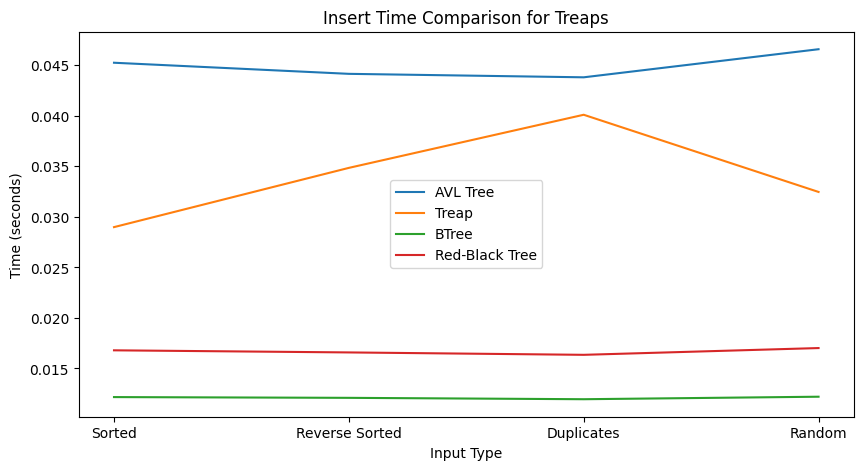

Data Size: 3000
                AVL Tree     Treap     BTree  Red-Black Tree
Sorted          0.045256  0.028986  0.012166        0.016794
Reverse Sorted  0.044157  0.034850  0.012091        0.016586
Duplicates      0.043813  0.040107  0.011955        0.016348
Random          0.046593  0.032468  0.012203        0.017018


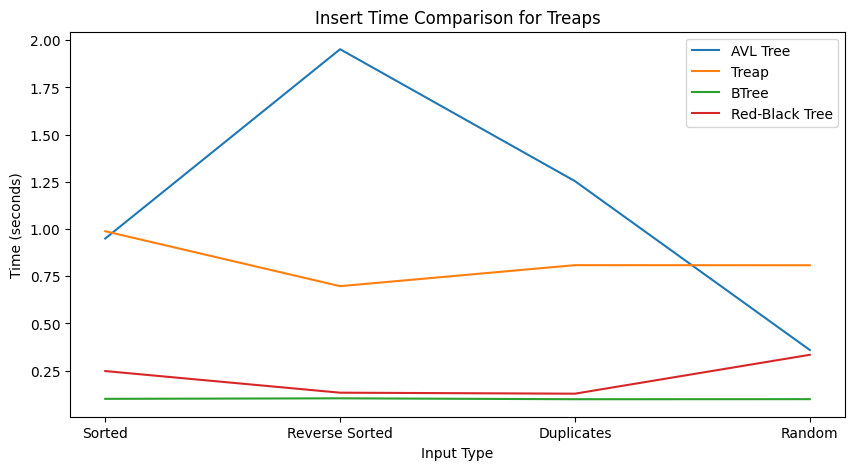

Data Size: 20000
                AVL Tree     Treap     BTree  Red-Black Tree
Sorted          0.949989  0.988612  0.101054        0.248125
Reverse Sorted  1.952345  0.697673  0.103776        0.133646
Duplicates      1.253894  0.808910  0.099007        0.128346
Random          0.359659  0.808453  0.099360        0.334182


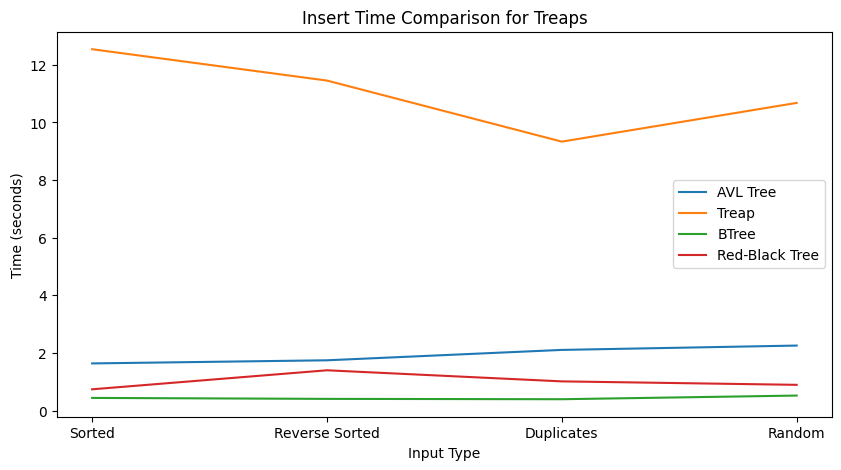

Data Size: 70000
                AVL Tree      Treap     BTree  Red-Black Tree
Sorted          1.635150  12.540477  0.437665        0.736671
Reverse Sorted  1.743834  11.452460  0.404576        1.396889
Duplicates      2.104104   9.333240  0.392515        1.011889
Random          2.254742  10.677177  0.519534        0.891959


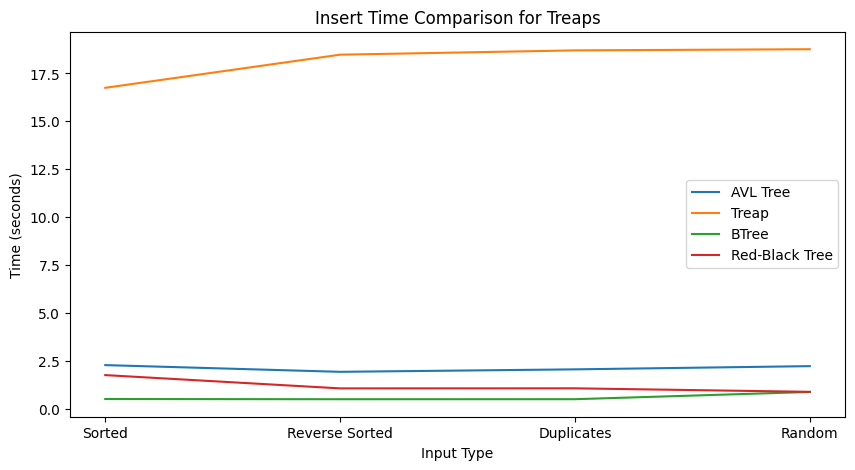

Data Size: 85000
                AVL Tree      Treap     BTree  Red-Black Tree
Sorted          2.282344  16.748640  0.513233        1.761581
Reverse Sorted  1.932448  18.476481  0.503050        1.068377
Duplicates      2.061047  18.701072  0.504286        1.071417
Random          2.229147  18.761581  0.881414        0.888360


In [8]:
def compare_insert_times_treaps(input_types, values):
    trees = ['AVL Tree', 'Treap', 'BTree', 'Red-Black Tree']
    tree_classes = [AVLTree, Treap, BTree, RedBlackTree]
    data = {tree: [] for tree in trees}

    plt.figure(figsize=(10, 5))

    for tree_index, TreeClass in enumerate(tree_classes):
        for value_index, value in enumerate(values):
            # Initialize tree with argument if it's BTree
            tree = TreeClass(3) if TreeClass == BTree else TreeClass()
            start = time.time()
            for key, val in zip(range(len(value)), value):
                # BTree's and RedBlackTree's insert method might only take one argument
                if TreeClass == BTree or TreeClass == RedBlackTree:
                    tree.insert(key)
                else:
                    tree.insert(key, val)
            time_taken = time.time() - start
            data[trees[tree_index]].append(time_taken)
        plt.plot(input_types, data[trees[tree_index]], label=trees[tree_index])

    plt.xlabel('Input Type')
    plt.ylabel('Time (seconds)')
    plt.title('Insert Time Comparison for Treaps')
    plt.legend()
    plt.show()

    return data

def generate_values_and_compare_insert_treaps():
    input_types = ['Sorted', 'Reverse Sorted', 'Duplicates', 'Random']
    data_sizes = [3000, 20000, 70000, 85000]
    df_list = []
    for data_size in data_sizes:
        values = [
            sorted([random.randint(1, data_size) for _ in range(data_size)]),  # Sorted
            sorted([random.randint(1, data_size) for _ in range(data_size)], reverse=True),  # Reverse Sorted
            [random.randint(1, data_size) for _ in range(10)] * (data_size // 10),  # Duplicates
            [random.randint(1, data_size) for _ in range(data_size)]  # Random
        ]
        data = compare_insert_times_treaps(input_types, values)
        df = pd.DataFrame(data, index=input_types)
        # df['Data Size'] = data_size
        print(f"Data Size: {data_size}")  # Print the data size
        print(df)  # Print the DataFrame for the current data size
        df_list.append(df)
    return pd.concat(df_list)

df = generate_values_and_compare_insert_treaps()

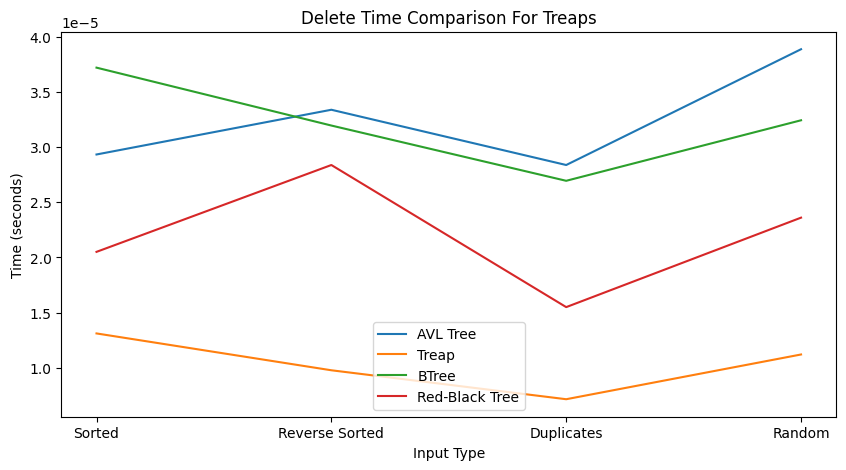

Data Size: 3000
                AVL Tree     Treap     BTree  Red-Black Tree
Sorted          0.000029  0.000013  0.000037        0.000021
Reverse Sorted  0.000033  0.000010  0.000032        0.000028
Duplicates      0.000028  0.000007  0.000027        0.000015
Random          0.000039  0.000011  0.000032        0.000024


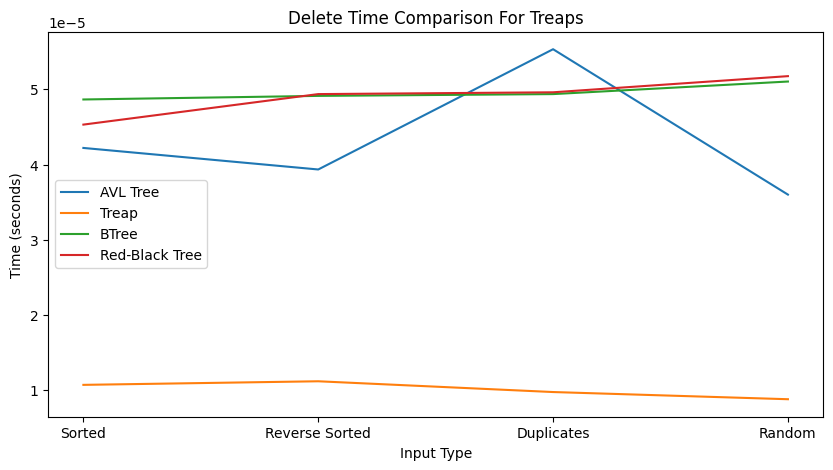

Data Size: 20000
                AVL Tree     Treap     BTree  Red-Black Tree
Sorted          0.000042  0.000011  0.000049        0.000045
Reverse Sorted  0.000039  0.000011  0.000049        0.000049
Duplicates      0.000055  0.000010  0.000049        0.000050
Random          0.000036  0.000009  0.000051        0.000052


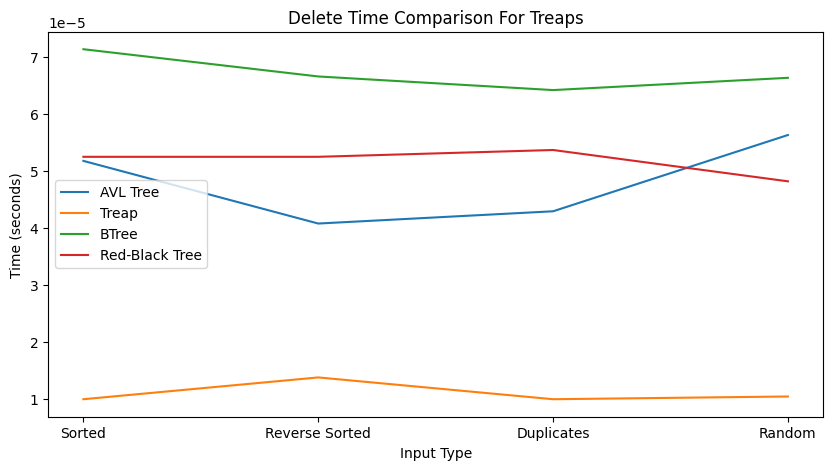

Data Size: 70000
                AVL Tree     Treap     BTree  Red-Black Tree
Sorted          0.000052  0.000010  0.000071        0.000052
Reverse Sorted  0.000041  0.000014  0.000067        0.000052
Duplicates      0.000043  0.000010  0.000064        0.000054
Random          0.000056  0.000010  0.000066        0.000048


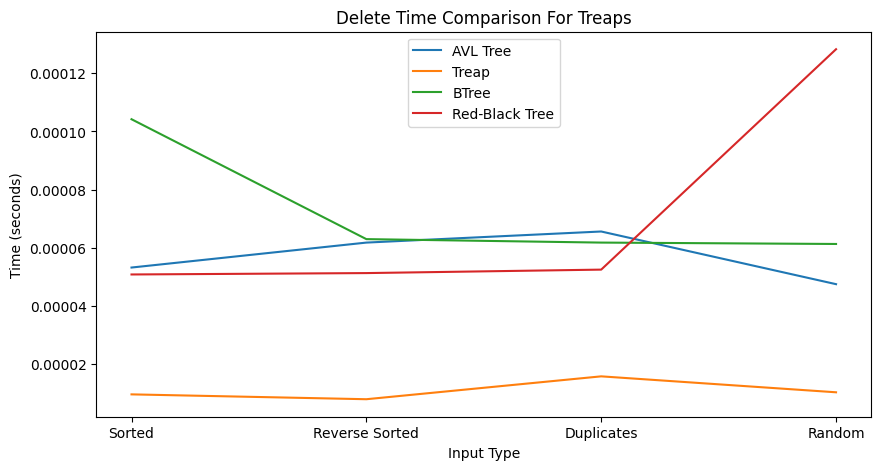

Data Size: 85000
                AVL Tree     Treap     BTree  Red-Black Tree
Sorted          0.000053  0.000010  0.000104        0.000051
Reverse Sorted  0.000062  0.000008  0.000063        0.000051
Duplicates      0.000066  0.000016  0.000062        0.000052
Random          0.000047  0.000010  0.000061        0.000128


In [ ]:
def compare_delete_times_treaps(input_types, values):
    trees = ['AVL Tree', 'Treap', 'BTree', 'Red-Black Tree']
    tree_classes = [AVLTree, Treap, BTree, RedBlackTree]
    data = {tree: [] for tree in trees}

    plt.figure(figsize=(10, 5))

    for tree_index, TreeClass in enumerate(tree_classes):
        for value_index, value in enumerate(values):
            # Initialize tree with argument if it's BTree
            tree = TreeClass(3) if TreeClass == BTree else TreeClass()
            for key, val in zip(range(len(value)), value):
                # BTree's and RedBlackTree's insert method might only take one argument
                if TreeClass == BTree or TreeClass == RedBlackTree:
                    tree.insert(key)
                else:
                    tree.insert(key, val)
            start = time.time()

            # BTree's and RedBlackTree's delete method might only take one argument
            if TreeClass == BTree:
                tree.delete(4)
            elif TreeClass == RedBlackTree:
                tree.delete_node(tree.root, 4)
            else:
                tree.delete(4)
            time_taken = time.time() - start
            data[trees[tree_index]].append(time_taken)
        plt.plot(input_types, data[trees[tree_index]], label=trees[tree_index])

    plt.xlabel('Input Type')
    plt.ylabel('Time (seconds)')
    plt.title('Delete Time Comparison For Treaps')
    plt.legend()
    plt.show()

    return data

def generate_values_and_compare_delete_treaps():
    input_types = ['Sorted', 'Reverse Sorted', 'Duplicates', 'Random']
    data_sizes = [3000, 20000, 70000, 85000]
    df_list = []
    for data_size in data_sizes:
        values = [
            sorted([random.randint(1, data_size) for _ in range(data_size)]),  # Sorted
            sorted([random.randint(1, data_size) for _ in range(data_size)], reverse=True),  # Reverse Sorted
            [random.randint(1, data_size) for _ in range(data_size)],  # Duplicates
            [random.randint(1, data_size) for _ in range(data_size)]  # Random
        ]
        data = compare_delete_times_treaps(input_types, values)
        df = pd.DataFrame(data, index=input_types)
        # df['Data Size'] = data_size
        print(f"Data Size: {data_size}")  # Print the data size
        print(df)  # Print the DataFrame for the current data size
        df_list.append(df)
    return pd.concat(df_list)

df = generate_values_and_compare_delete_treaps()

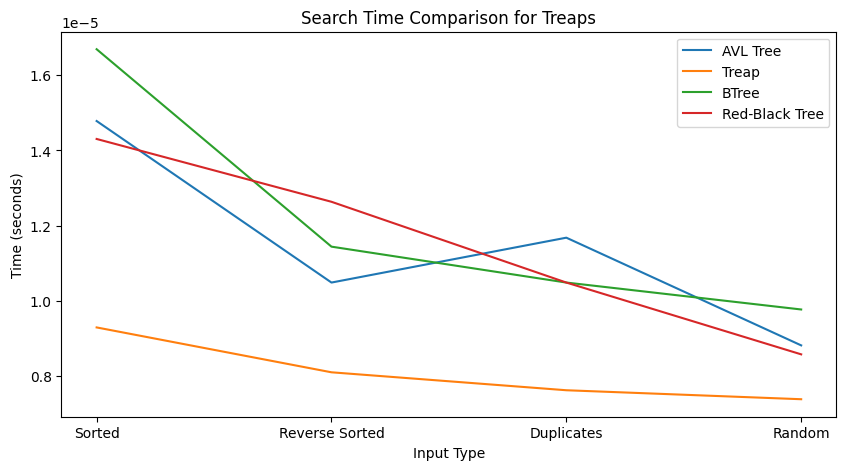

Data Size: 3000
                AVL Tree     Treap     BTree  Red-Black Tree
Sorted          0.000015  0.000009  0.000017        0.000014
Reverse Sorted  0.000010  0.000008  0.000011        0.000013
Duplicates      0.000012  0.000008  0.000010        0.000010
Random          0.000009  0.000007  0.000010        0.000009


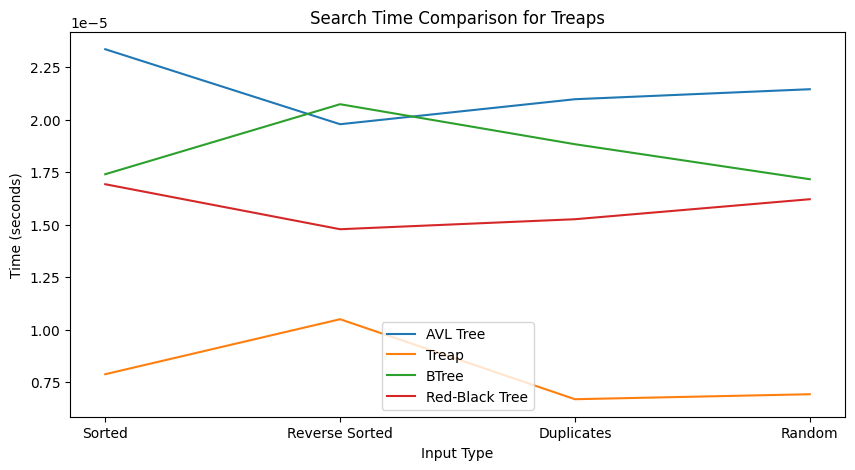

Data Size: 20000
                AVL Tree     Treap     BTree  Red-Black Tree
Sorted          0.000023  0.000008  0.000017        0.000017
Reverse Sorted  0.000020  0.000010  0.000021        0.000015
Duplicates      0.000021  0.000007  0.000019        0.000015
Random          0.000021  0.000007  0.000017        0.000016


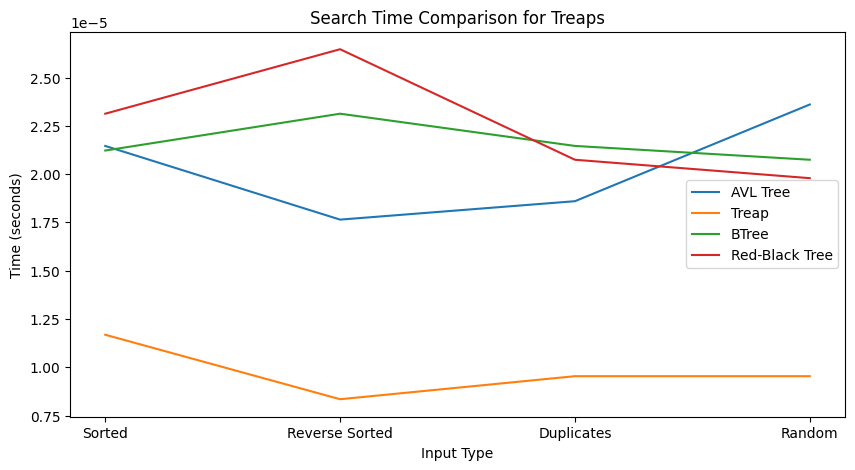

Data Size: 70000
                AVL Tree     Treap     BTree  Red-Black Tree
Sorted          0.000021  0.000012  0.000021        0.000023
Reverse Sorted  0.000018  0.000008  0.000023        0.000026
Duplicates      0.000019  0.000010  0.000021        0.000021
Random          0.000024  0.000010  0.000021        0.000020


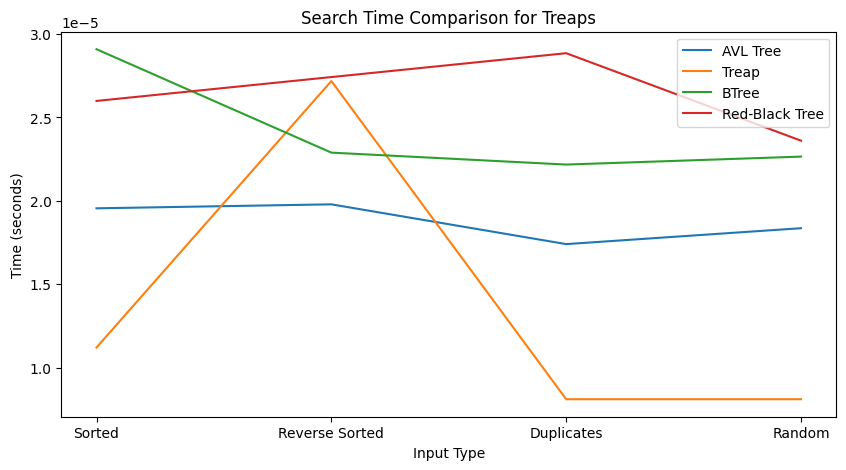

Data Size: 85000
                AVL Tree     Treap     BTree  Red-Black Tree
Sorted          0.000020  0.000011  0.000029        0.000026
Reverse Sorted  0.000020  0.000027  0.000023        0.000027
Duplicates      0.000017  0.000008  0.000022        0.000029
Random          0.000018  0.000008  0.000023        0.000024


In [ ]:
def compare_search_times_treaps(input_types, values):
    trees = ['AVL Tree', 'Treap', 'BTree', 'Red-Black Tree']
    tree_classes = [AVLTree, Treap, BTree, RedBlackTree]
    data = {tree: [] for tree in trees}

    plt.figure(figsize=(10, 5))

    for tree_index, TreeClass in enumerate(tree_classes):
        for value_index, value in enumerate(values):
            # Initialize tree with argument if it's BTree
            tree = TreeClass(3) if TreeClass == BTree else TreeClass()
            # Insert values into the tree
            for key, val in zip(range(len(value)), value):
                if TreeClass == BTree or TreeClass == RedBlackTree:
                    tree.insert(key)
                else:
                    tree.insert(key, val)
            # Measure search time
            start = time.time()

            if TreeClass == RedBlackTree:
                tree.search(tree.root,4)
            else:
                tree.search(4)
            time_taken = time.time() - start
            data[trees[tree_index]].append(time_taken)
        plt.plot(input_types, data[trees[tree_index]], label=trees[tree_index])

    plt.xlabel('Input Type')
    plt.ylabel('Time (seconds)')
    plt.title('Search Time Comparison for Treaps')
    plt.legend()
    plt.show()

    return data

def generate_values_and_compare_search_treaps():
    input_types = ['Sorted', 'Reverse Sorted', 'Duplicates', 'Random']
    data_sizes = [3000, 20000, 70000, 85000]
    df_list = []
    for data_size in data_sizes:
        values = [
            sorted([random.randint(1, data_size) for _ in range(data_size)]),  # Sorted
            sorted([random.randint(1, data_size) for _ in range(data_size)], reverse=True),  # Reverse Sorted
            [random.randint(1, data_size) for _ in range(data_size)],  # Duplicates
            [random.randint(1, data_size) for _ in range(data_size)]  # Random
        ]
        data = compare_search_times_treaps(input_types, values)
        df = pd.DataFrame(data, index=input_types)
        # df['Data Size'] = data_size
        print(f"Data Size: {data_size}")  # Print the data size
        print(df)  # Print the DataFrame for the current data size
        df_list.append(df)
    return pd.concat(df_list)

df = generate_values_and_compare_search_treaps()

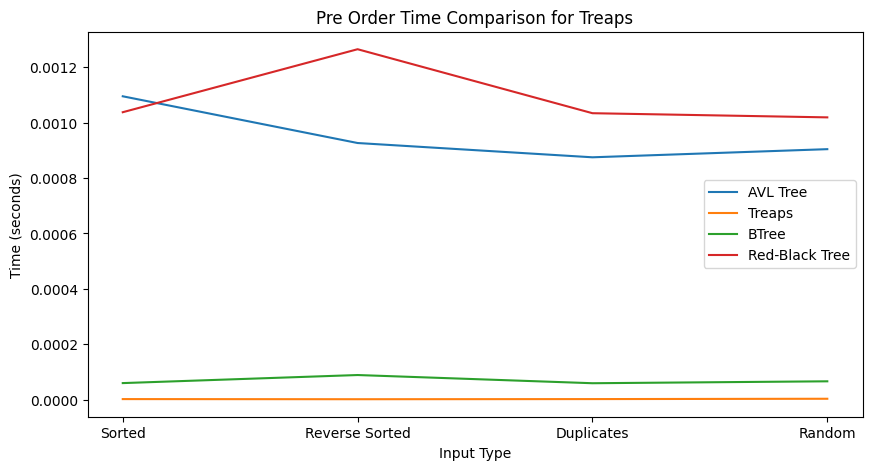

Data Size: 3000
                AVL Tree    Treaps     BTree  Red-Black Tree
Sorted          0.001095  0.000003  0.000060        0.001037
Reverse Sorted  0.000926  0.000002  0.000089        0.001265
Duplicates      0.000875  0.000003  0.000060        0.001034
Random          0.000904  0.000004  0.000067        0.001019


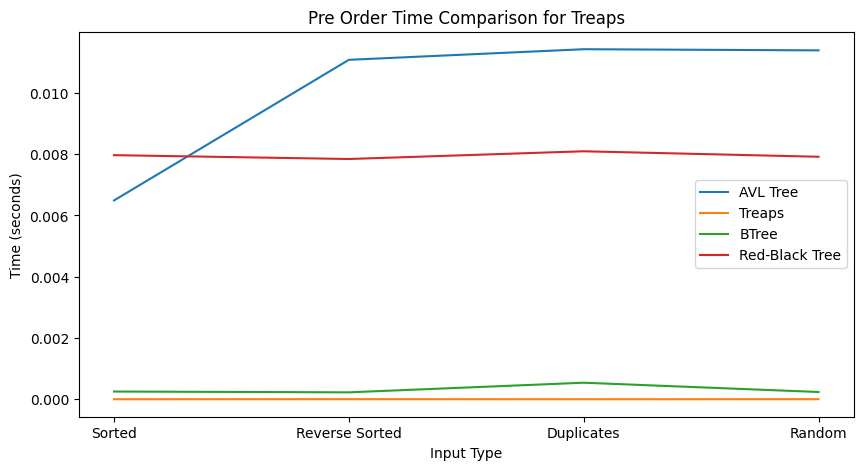

Data Size: 20000
                AVL Tree    Treaps     BTree  Red-Black Tree
Sorted          0.006490  0.000002  0.000253        0.007968
Reverse Sorted  0.011080  0.000003  0.000226        0.007843
Duplicates      0.011426  0.000002  0.000541        0.008095
Random          0.011389  0.000003  0.000238        0.007916


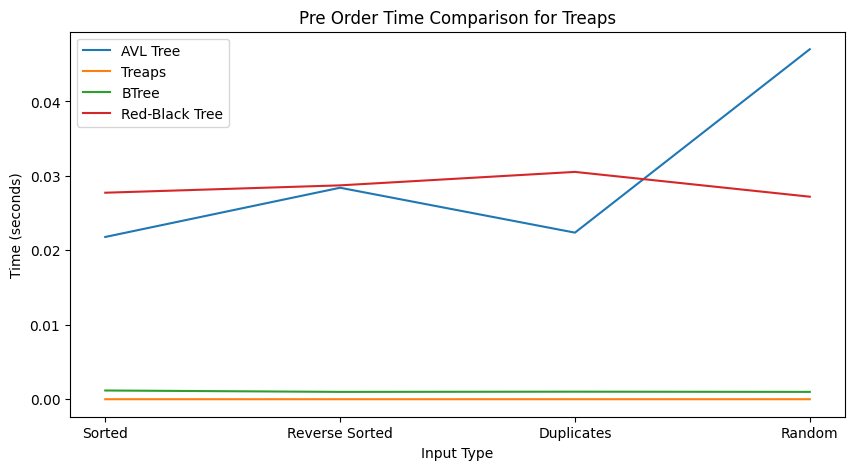

Data Size: 70000
                AVL Tree    Treaps     BTree  Red-Black Tree
Sorted          0.021795  0.000003  0.001175        0.027737
Reverse Sorted  0.028407  0.000002  0.000987        0.028727
Duplicates      0.022376  0.000003  0.001015        0.030534
Random          0.047011  0.000003  0.000987        0.027203


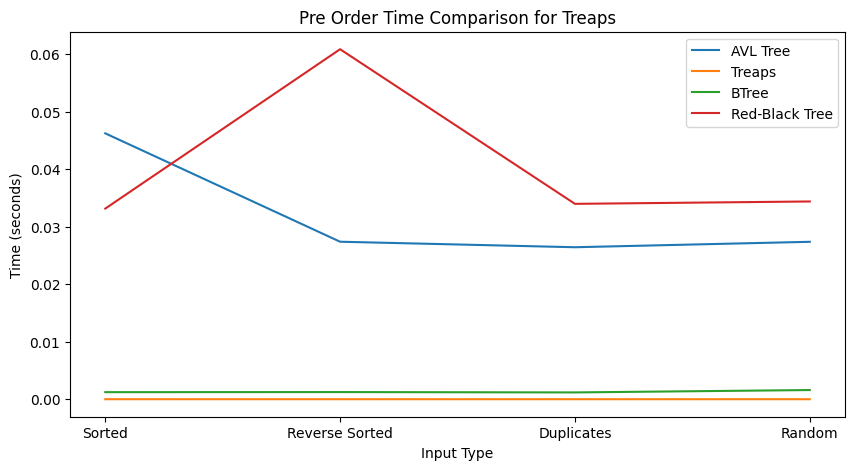

Data Size: 85000
                AVL Tree    Treaps     BTree  Red-Black Tree
Sorted          0.046212  0.000003  0.001229        0.033132
Reverse Sorted  0.027375  0.000003  0.001245        0.060832
Duplicates      0.026417  0.000003  0.001184        0.033959
Random          0.027362  0.000002  0.001598        0.034371


In [ ]:
def compare_pre_order_times_treaps(input_types, values, tree_objects):
    trees = ['AVL Tree', 'Treaps', 'BTree', 'Red-Black Tree']
    tree_classes = [AVLTree, Treap, BTree, RedBlackTree]
    data = {tree: [] for tree in trees}

    plt.figure(figsize=(10, 5))

    for tree_index, TreeClass in enumerate(tree_classes):
        for value_index, value in enumerate(values):
            # Initialize tree with argument if it's BTree
            tree = TreeClass(3) if TreeClass == BTree else TreeClass()
            for key, val in zip(range(len(value)), value):
            # BTree's and RedBlackTree's insert method might only take one argument
                if TreeClass == BTree or TreeClass == RedBlackTree:
                    tree.insert(key)
                else:
                    tree.insert(key, val)

            start = time.time()
            if trees[tree_index] == 'BTree':
                tree.preorder(tree.root)
            elif trees[tree_index] == 'Red-Black Tree':
                tree.preorder()
            elif trees[tree_index] == 'AVL Tree':
                tree.preorder(tree.root)
            elif trees[tree_index] == 'Treap':
                tree.preorder(tree.root)
            time_taken = time.time() - start
            data[trees[tree_index]].append(time_taken)

        plt.plot(input_types, data[trees[tree_index]], label=trees[tree_index])

    plt.ylabel('Time (seconds)')
    plt.xlabel('Input Type')  # This should be xlabel, not ylabel
    plt.title('Pre Order Time Comparison for Treaps')
    plt.legend()
    plt.show()
    return data

def generate_trees_and_compare_preorder():
    input_types = ['Sorted', 'Reverse Sorted', 'Duplicates', 'Random']
    tree_objects = [AVLTree(), Treap(), BTree(3), RedBlackTree()]
    data_sizes = [3000, 20000, 70000, 85000]
    df_list = []
    for data_size in data_sizes:
        values = [
            sorted([random.randint(1, data_size) for _ in range(data_size)]),  # Sorted
            sorted([random.randint(1, data_size) for _ in range(data_size)], reverse=True),  # Reverse Sorted
            [random.randint(1, data_size) for _ in range(data_size)],  # Duplicates
            [random.randint(1, data_size) for _ in range(data_size)]  # Random
        ]
        data = compare_pre_order_times_treaps(input_types, values, tree_objects)
        df = pd.DataFrame(data, index=input_types)
        # df['Data Size'] = data_size
        print(f"Data Size: {data_size}")  # Print the data size
        print(df)  # Print the DataFrame for the current data size
        df_list.append(df)
    return pd.concat(df_list)

df = generate_trees_and_compare_preorder()

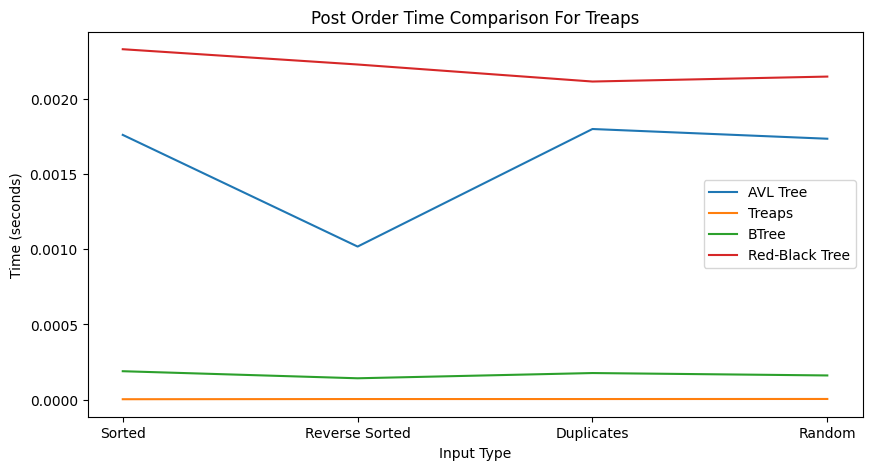

Data Size: 3000
                AVL Tree    Treaps     BTree  Red-Black Tree
Sorted          0.001760  0.000003  0.000189        0.002330
Reverse Sorted  0.001018  0.000004  0.000142        0.002228
Duplicates      0.001800  0.000004  0.000177        0.002115
Random          0.001735  0.000005  0.000161        0.002148


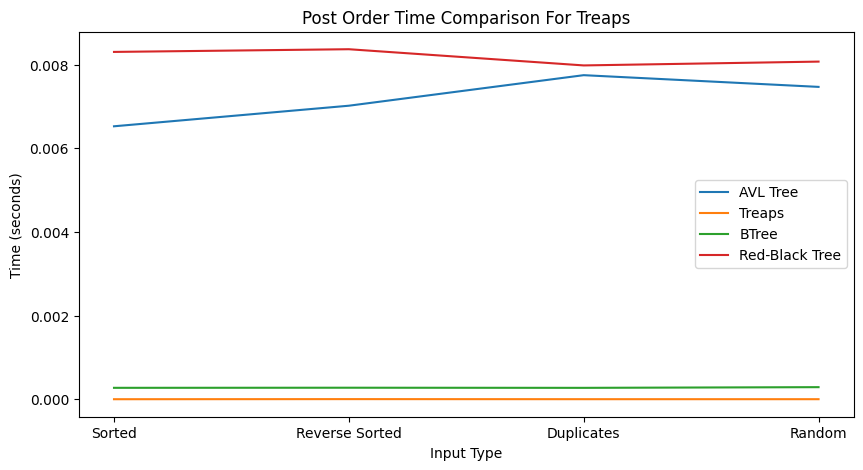

Data Size: 20000
                AVL Tree    Treaps     BTree  Red-Black Tree
Sorted          0.006525  0.000003  0.000275        0.008302
Reverse Sorted  0.007016  0.000005  0.000278        0.008366
Duplicates      0.007746  0.000003  0.000274        0.007979
Random          0.007466  0.000003  0.000291        0.008070


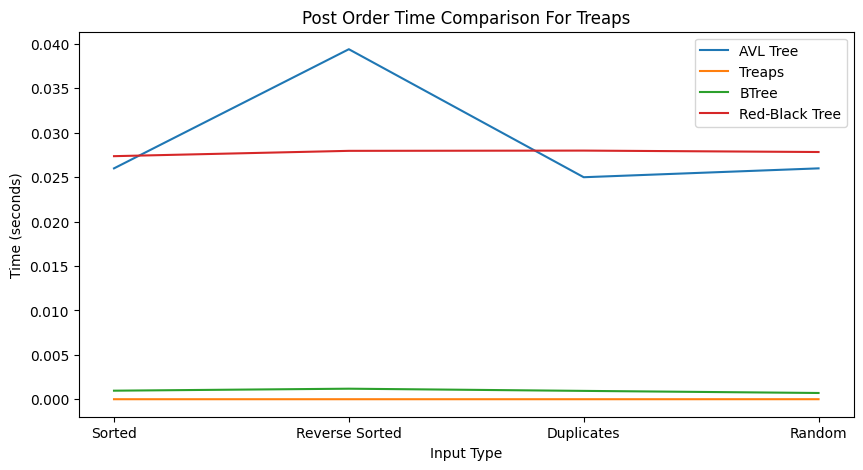

Data Size: 70000
                AVL Tree    Treaps     BTree  Red-Black Tree
Sorted          0.025994  0.000003  0.000964        0.027368
Reverse Sorted  0.039408  0.000003  0.001188        0.027967
Duplicates      0.024997  0.000003  0.000942        0.027995
Random          0.025994  0.000004  0.000705        0.027835


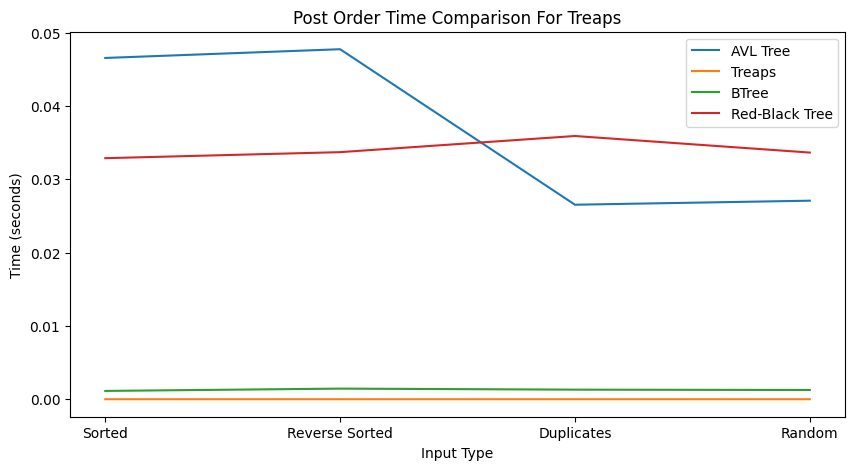

Data Size: 85000
                AVL Tree    Treaps     BTree  Red-Black Tree
Sorted          0.046531  0.000003  0.001134        0.032866
Reverse Sorted  0.047721  0.000003  0.001449        0.033689
Duplicates      0.026522  0.000003  0.001308        0.035890
Random          0.027070  0.000003  0.001259        0.033631


In [9]:
def compare_post_order_times_treaps(input_types, values, tree_objects):
    trees = ['AVL Tree', 'Treaps', 'BTree', 'Red-Black Tree']
    tree_classes = [AVLTree, Treap, BTree, RedBlackTree]
    data = {tree: [] for tree in trees}

    plt.figure(figsize=(10, 5))

    for tree_index, TreeClass in enumerate(tree_classes):
        for value_index, value in enumerate(values):
            # Initialize tree with argument if it's BTree
            tree = TreeClass(3) if TreeClass == BTree else TreeClass()
            for key, val in zip(range(len(value)), value):
            # BTree's and RedBlackTree's insert method might only take one argument
                if TreeClass == BTree or TreeClass == RedBlackTree:
                    tree.insert(key)
                else:
                    tree.insert(key, val)

            start = time.time()
            if trees[tree_index] == 'BTree':
                tree.preorder(tree.root)
            elif trees[tree_index] == 'Red-Black Tree':
                tree.preorder()
            elif trees[tree_index] == 'AVL Tree':
                tree.preorder(tree.root)
            elif trees[tree_index] == 'Treap':
                tree.preorder(tree.root)
            time_taken = time.time() - start
            data[trees[tree_index]].append(time_taken)

        plt.plot(input_types, data[trees[tree_index]], label=trees[tree_index])

    plt.ylabel('Time (seconds)')
    plt.xlabel('Input Type')  # This should be xlabel, not ylabel
    plt.title('Post Order Time Comparison For Treaps')
    plt.legend()
    plt.show()
    return data

def generate_trees_and_compare_postorder():
    input_types = ['Sorted', 'Reverse Sorted', 'Duplicates', 'Random']
    tree_objects = [AVLTree(), Treap(), BTree(3), RedBlackTree()]
    data_sizes = [3000, 20000, 70000, 85000]
    df_list = []
    for data_size in data_sizes:
        values = [
            sorted([random.randint(1, data_size) for _ in range(data_size)]),  # Sorted
            sorted([random.randint(1, data_size) for _ in range(data_size)], reverse=True),  # Reverse Sorted
            [random.randint(1, data_size) for _ in range(data_size)],  # Duplicates
            [random.randint(1, data_size) for _ in range(data_size)]  # Random
        ]
        data = compare_post_order_times_treaps(input_types, values, tree_objects)
        df = pd.DataFrame(data, index=input_types)
        # df['Data Size'] = data_size
        print(f"Data Size: {data_size}")  # Print the data size
        print(df)  # Print the DataFrame for the current data size
        df_list.append(df)
    return pd.concat(df_list)

df = generate_trees_and_compare_postorder()

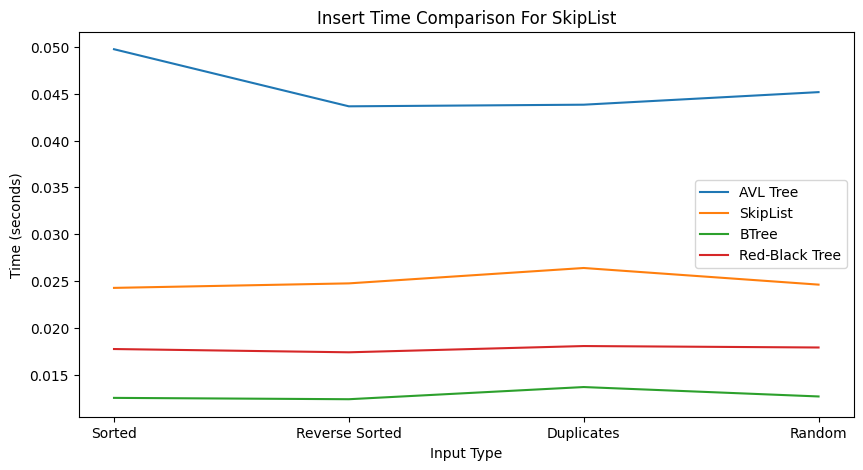

Data Size: 3000
                AVL Tree  SkipList     BTree  Red-Black Tree
Sorted          0.049745  0.024273  0.012534        0.017747
Reverse Sorted  0.043651  0.024755  0.012390        0.017398
Duplicates      0.043825  0.026396  0.013689        0.018066
Random          0.045166  0.024621  0.012685        0.017911


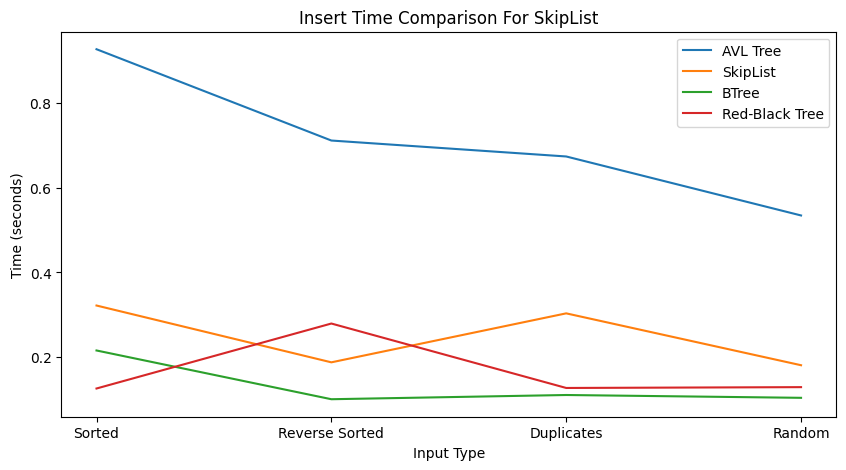

Data Size: 20000
                AVL Tree  SkipList     BTree  Red-Black Tree
Sorted          0.925904  0.322126  0.216223        0.126637
Reverse Sorted  0.710799  0.188293  0.101388        0.279716
Duplicates      0.673239  0.303671  0.111329        0.127905
Random          0.534268  0.181483  0.104686        0.129847


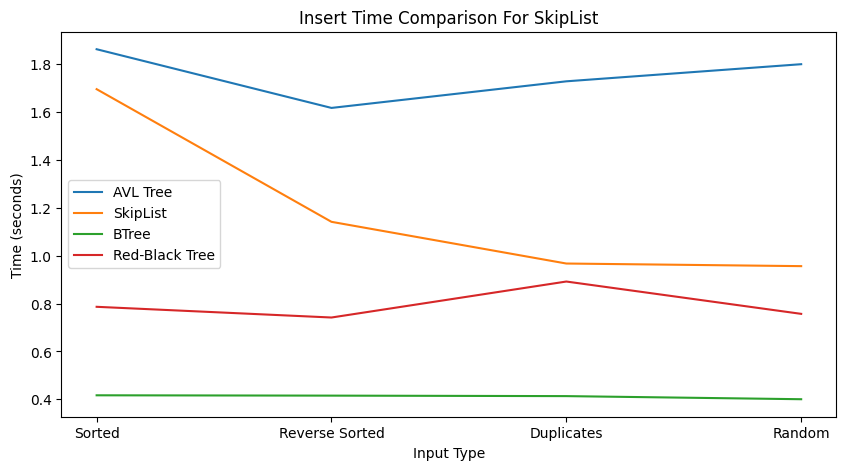

Data Size: 70000
                AVL Tree  SkipList     BTree  Red-Black Tree
Sorted          1.862271  1.695409  0.416674        0.786316
Reverse Sorted  1.617076  1.141287  0.415301        0.741588
Duplicates      1.728216  0.967085  0.413265        0.891891
Random          1.799707  0.956184  0.400282        0.756854


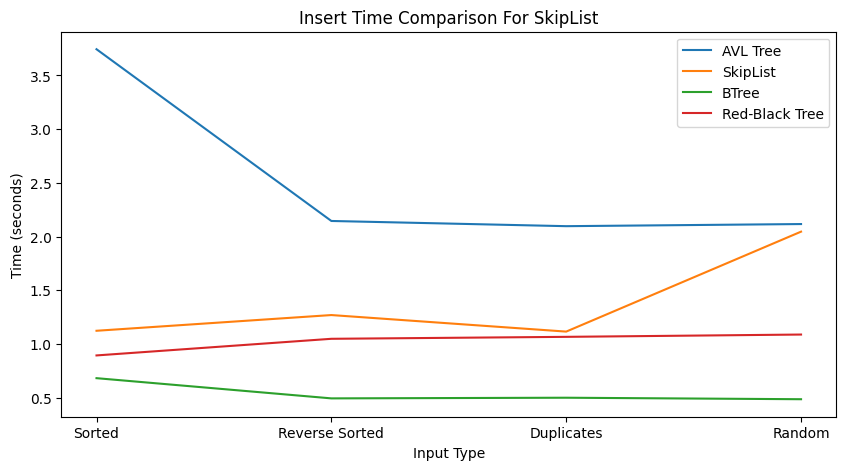

Data Size: 85000
                AVL Tree  SkipList     BTree  Red-Black Tree
Sorted          3.744681  1.122497  0.681046        0.892837
Reverse Sorted  2.145087  1.268846  0.492828        1.047726
Duplicates      2.096655  1.114758  0.498915        1.065916
Random          2.116409  2.045636  0.484972        1.087344


In [10]:
def compare_insert_times_skiplist(input_types, values):
    trees = ['AVL Tree', 'SkipList', 'BTree', 'Red-Black Tree']
    tree_classes = [AVLTree, SkipList, BTree, RedBlackTree]
    data = {tree: [] for tree in trees}

    plt.figure(figsize=(10, 5))

    for tree_index, TreeClass in enumerate(tree_classes):
        for value_index, value in enumerate(values):
            # Initialize tree with argument if it's BTree
            tree = TreeClass(3) if TreeClass == BTree else TreeClass()
            start = time.time()
            for key, val in zip(range(len(value)), value):
                # BTree's, RedBlackTree's and SkipList's insert method might only take one argument
                if TreeClass == BTree or TreeClass == RedBlackTree or TreeClass == SkipList:
                    tree.insert(key)
                else:
                    tree.insert(key, val)
            time_taken = time.time() - start
            data[trees[tree_index]].append(time_taken)
        plt.plot(input_types, data[trees[tree_index]], label=trees[tree_index])

    plt.xlabel('Input Type')
    plt.ylabel('Time (seconds)')
    plt.title('Insert Time Comparison For SkipList')
    plt.legend()
    plt.show()

    return data

def generate_values_and_compare_skiplist_insert():
    input_types = ['Sorted', 'Reverse Sorted', 'Duplicates', 'Random']
    data_sizes = [3000, 20000, 70000, 85000]
    df_list = []
    for data_size in data_sizes:
        values = [
            sorted([random.randint(1, data_size) for _ in range(data_size)]),  # Sorted
            sorted([random.randint(1, data_size) for _ in range(data_size)], reverse=True),  # Reverse Sorted
            [random.randint(1, data_size) for _ in range(data_size)],  # Duplicates
            [random.randint(1, data_size) for _ in range(data_size)]  # Random
        ]
        data = compare_insert_times_skiplist(input_types, values)
        df = pd.DataFrame(data, index=input_types)
        # df['Data Size'] = data_size
        print(f"Data Size: {data_size}")  # Print the data size
        print(df)  # Print the DataFrame for the current data size
        df_list.append(df)
    return pd.concat(df_list)

df = generate_values_and_compare_skiplist_insert()

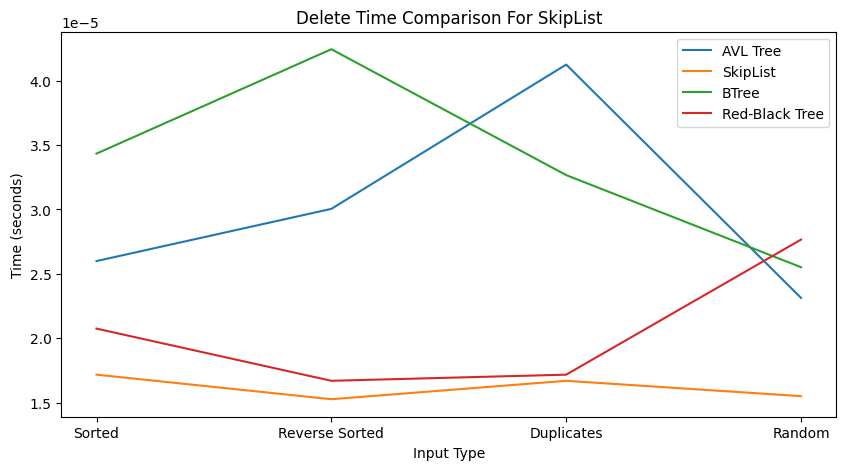

Data Size: 3000
                AVL Tree  SkipList     BTree  Red-Black Tree
Sorted          0.000026  0.000017  0.000034        0.000021
Reverse Sorted  0.000030  0.000015  0.000042        0.000017
Duplicates      0.000041  0.000017  0.000033        0.000017
Random          0.000023  0.000015  0.000026        0.000028


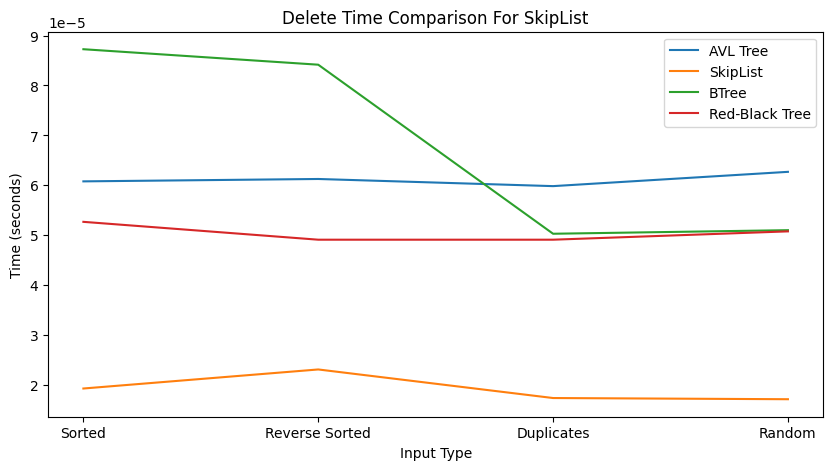

Data Size: 20000
                AVL Tree  SkipList     BTree  Red-Black Tree
Sorted          0.000061  0.000019  0.000087        0.000053
Reverse Sorted  0.000061  0.000023  0.000084        0.000049
Duplicates      0.000060  0.000017  0.000050        0.000049
Random          0.000063  0.000017  0.000051        0.000051


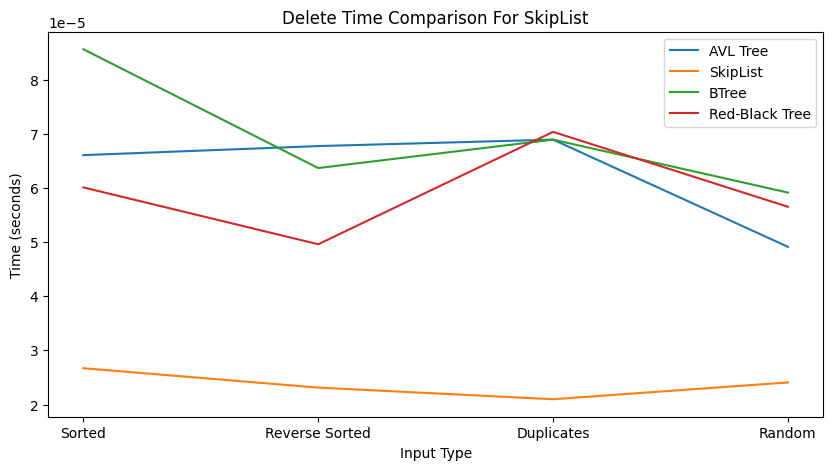

Data Size: 70000
                AVL Tree  SkipList     BTree  Red-Black Tree
Sorted          0.000066  0.000027  0.000086        0.000060
Reverse Sorted  0.000068  0.000023  0.000064        0.000050
Duplicates      0.000069  0.000021  0.000069        0.000070
Random          0.000049  0.000024  0.000059        0.000057


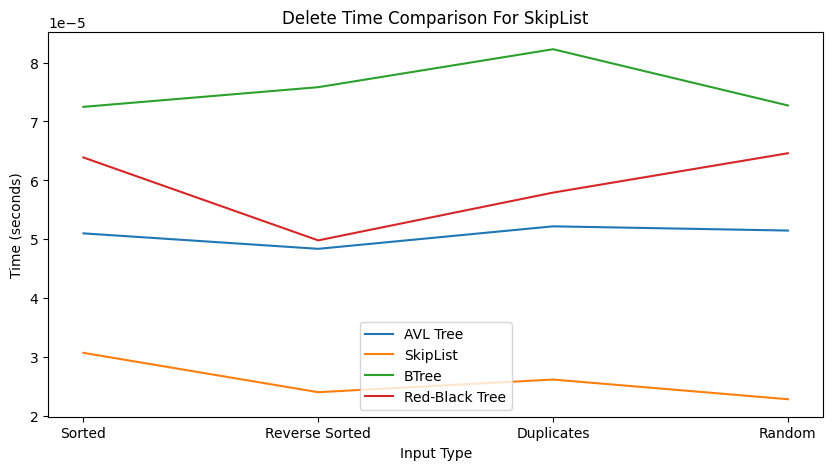

Data Size: 85000
                AVL Tree  SkipList     BTree  Red-Black Tree
Sorted          0.000051  0.000031  0.000072        0.000064
Reverse Sorted  0.000048  0.000024  0.000076        0.000050
Duplicates      0.000052  0.000026  0.000082        0.000058
Random          0.000051  0.000023  0.000073        0.000065


In [11]:
def compare_delete_times_skiplists(input_types, values):
    trees = ['AVL Tree', 'SkipList', 'BTree', 'Red-Black Tree']
    tree_classes = [AVLTree, SkipList, BTree, RedBlackTree]
    data = {tree: [] for tree in trees}

    plt.figure(figsize=(10, 5))

    for tree_index, TreeClass in enumerate(tree_classes):
        for value_index, value in enumerate(values):
            # Initialize tree with argument if it's BTree
            tree = TreeClass(3) if TreeClass == BTree else TreeClass()
            start = time.time()
            for key, val in zip(range(len(value)), value):
                # BTree's, RedBlackTree's and SkipList's insert method might only take one argument
                if TreeClass == BTree or TreeClass == RedBlackTree or TreeClass == SkipList:
                    tree.insert(key)
                else:
                    tree.insert(key, val)

            start = time.time()

            # BTree's and RedBlackTree's delete method might only take one argument
            if TreeClass == BTree:
                tree.delete(4)
            elif TreeClass == RedBlackTree:
                tree.delete_node(tree.root, 4)
            else:
                tree.delete(4)
            time_taken = time.time() - start
            data[trees[tree_index]].append(time_taken)
        plt.plot(input_types, data[trees[tree_index]], label=trees[tree_index])

    plt.xlabel('Input Type')
    plt.ylabel('Time (seconds)')
    plt.title('Delete Time Comparison For SkipList')
    plt.legend()
    plt.show()

    return data

def generate_values_and_compare_skiplist_delete():
    input_types = ['Sorted', 'Reverse Sorted', 'Duplicates', 'Random']
    data_sizes = [3000, 20000, 70000, 85000]
    df_list = []
    for data_size in data_sizes:
        values = [
            sorted([random.randint(1, data_size) for _ in range(data_size)]),  # Sorted
            sorted([random.randint(1, data_size) for _ in range(data_size)], reverse=True),  # Reverse Sorted
            [random.randint(1, data_size) for _ in range(data_size)],  # Duplicates
            [random.randint(1, data_size) for _ in range(data_size)]  # Random
        ]
        data = compare_delete_times_skiplists(input_types, values)
        df = pd.DataFrame(data, index=input_types)
        # df['Data Size'] = data_size
        print(f"Data Size: {data_size}")  # Print the data size
        print(df)  # Print the DataFrame for the current data size
        df_list.append(df)
    return pd.concat(df_list)

df = generate_values_and_compare_skiplist_delete()

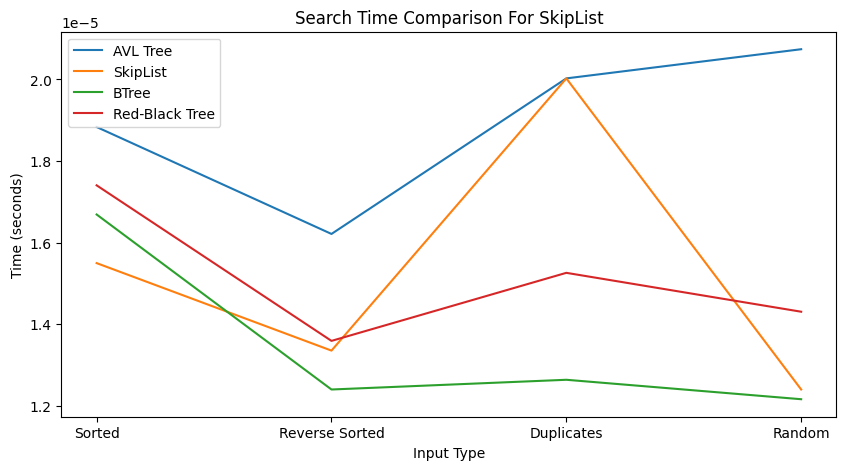

Data Size: 3000
                AVL Tree  SkipList     BTree  Red-Black Tree
Sorted          0.000019  0.000015  0.000017        0.000017
Reverse Sorted  0.000016  0.000013  0.000012        0.000014
Duplicates      0.000020  0.000020  0.000013        0.000015
Random          0.000021  0.000012  0.000012        0.000014


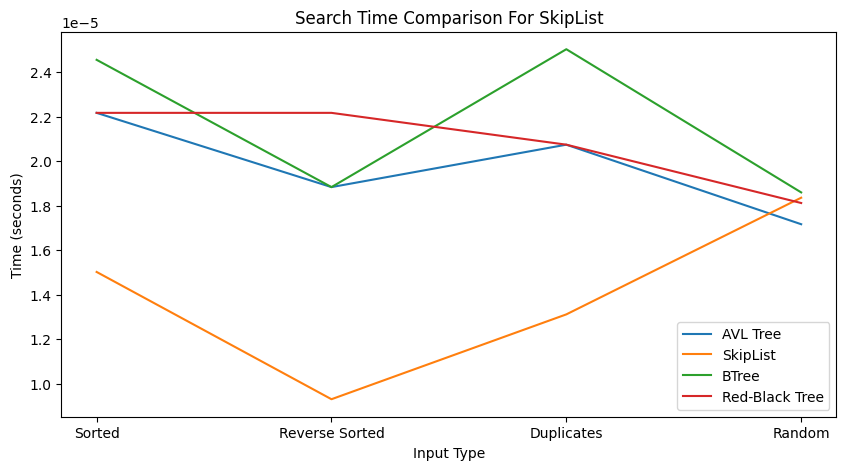

Data Size: 20000
                AVL Tree  SkipList     BTree  Red-Black Tree
Sorted          0.000022  0.000015  0.000025        0.000022
Reverse Sorted  0.000019  0.000009  0.000019        0.000022
Duplicates      0.000021  0.000013  0.000025        0.000021
Random          0.000017  0.000018  0.000019        0.000018


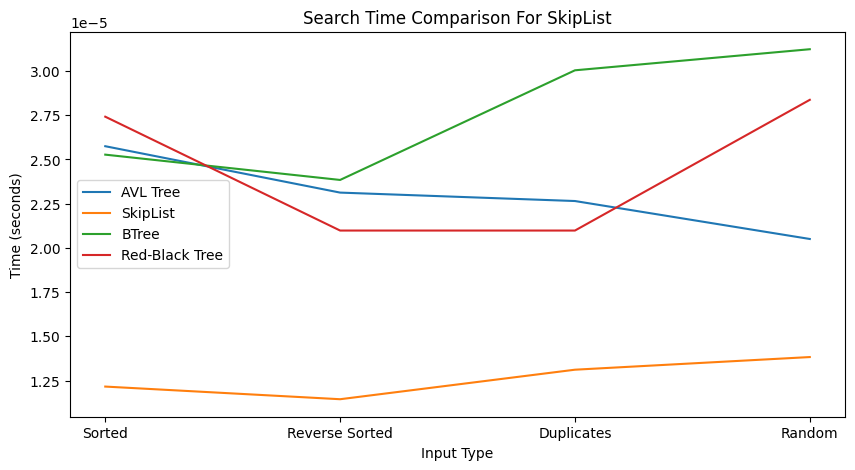

Data Size: 70000
                AVL Tree  SkipList     BTree  Red-Black Tree
Sorted          0.000026  0.000012  0.000025        0.000027
Reverse Sorted  0.000023  0.000011  0.000024        0.000021
Duplicates      0.000023  0.000013  0.000030        0.000021
Random          0.000021  0.000014  0.000031        0.000028


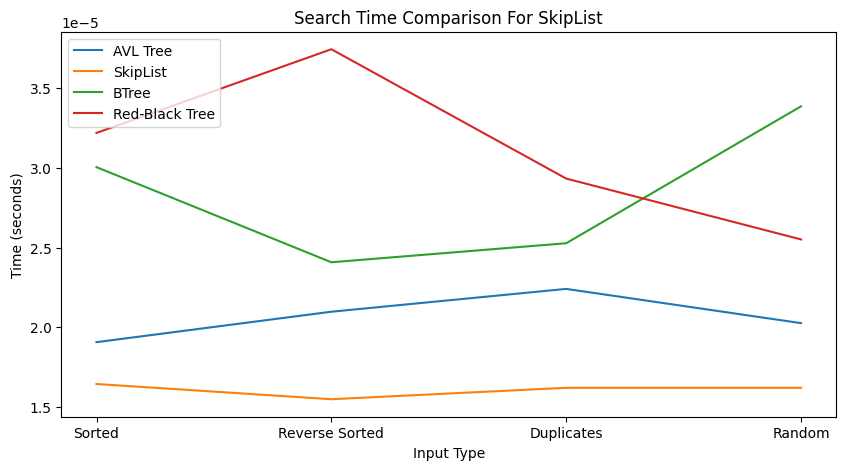

Data Size: 85000
                AVL Tree  SkipList     BTree  Red-Black Tree
Sorted          0.000019  0.000016  0.000030        0.000032
Reverse Sorted  0.000021  0.000015  0.000024        0.000037
Duplicates      0.000022  0.000016  0.000025        0.000029
Random          0.000020  0.000016  0.000034        0.000026


In [12]:
def compare_search_times_skiplist(input_types, values):
    trees = ['AVL Tree', 'SkipList', 'BTree', 'Red-Black Tree']
    tree_classes = [AVLTree, SkipList, BTree, RedBlackTree]
    data = {tree: [] for tree in trees}

    plt.figure(figsize=(10, 5))

    for tree_index, TreeClass in enumerate(tree_classes):
        for value_index, value in enumerate(values):
            # Initialize tree with argument if it's BTree
            tree = TreeClass(3) if TreeClass == BTree else TreeClass()
            # Insert values into the tree
            for key, val in zip(range(len(value)), value):
                if TreeClass == BTree or TreeClass == RedBlackTree or TreeClass == SkipList:
                    tree.insert(key)
                else:
                    tree.insert(key, val)
            # Measure search time
            start = time.time()

            if TreeClass == RedBlackTree:
                tree.search(tree.root,4)
            else:
                tree.search(4)
            time_taken = time.time() - start
            data[trees[tree_index]].append(time_taken)
        plt.plot(input_types, data[trees[tree_index]], label=trees[tree_index])

    plt.xlabel('Input Type')
    plt.ylabel('Time (seconds)')
    plt.title('Search Time Comparison For SkipList')
    plt.legend()
    plt.show()

    return data

def generate_values_and_compare_search_skiplist():
    input_types = ['Sorted', 'Reverse Sorted', 'Duplicates', 'Random']
    data_sizes = [3000, 20000, 70000, 85000]
    df_list = []
    for data_size in data_sizes:
        values = [
            sorted([random.randint(1, data_size) for _ in range(data_size)]),  # Sorted
            sorted([random.randint(1, data_size) for _ in range(data_size)], reverse=True),  # Reverse Sorted
            [random.randint(1, data_size) for _ in range(data_size)],  # Duplicates
            [random.randint(1, data_size) for _ in range(data_size)]  # Random
        ]
        data = compare_search_times_skiplist(input_types, values)
        df = pd.DataFrame(data, index=input_types)
        # df['Data Size'] = data_size
        print(f"Data Size: {data_size}")  # Print the data size
        print(df)  # Print the DataFrame for the current data size
        df_list.append(df)
    return pd.concat(df_list)

df = generate_values_and_compare_search_skiplist()

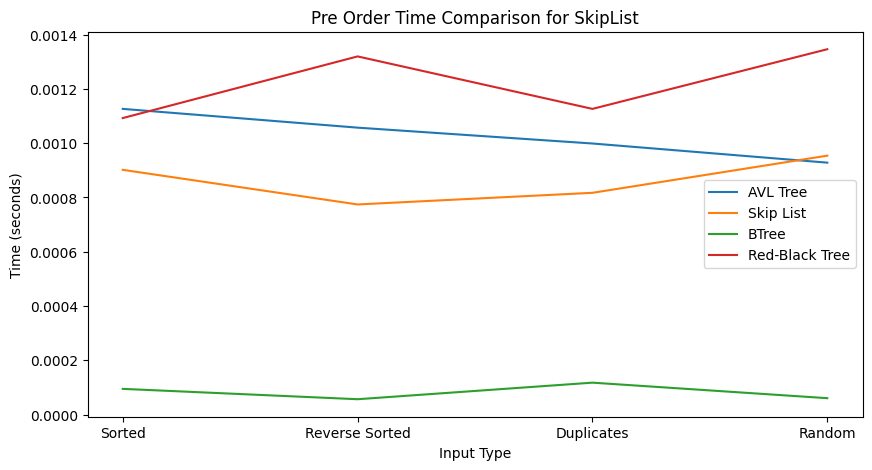

Data Size: 3000
                AVL Tree  Skip List     BTree  Red-Black Tree
Sorted          0.001126   0.000902  0.000095        0.001092
Reverse Sorted  0.001057   0.000774  0.000057        0.001320
Duplicates      0.000999   0.000817  0.000118        0.001126
Random          0.000928   0.000954  0.000060        0.001346


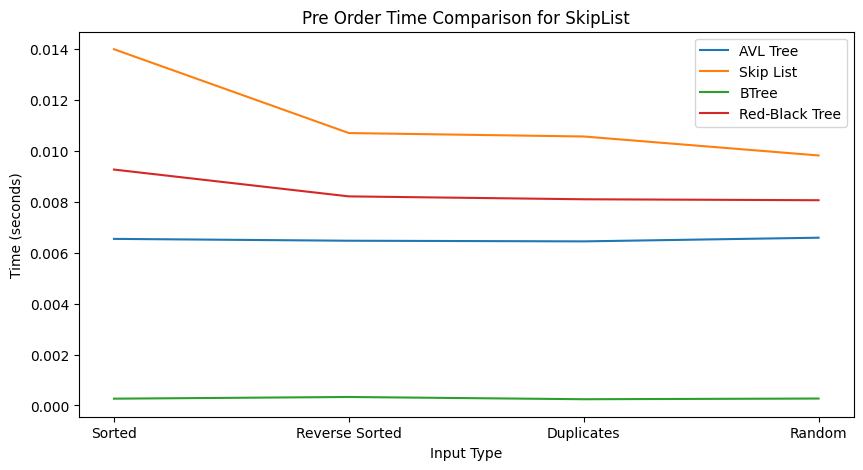

Data Size: 20000
                AVL Tree  Skip List     BTree  Red-Black Tree
Sorted          0.006547   0.014003  0.000266        0.009272
Reverse Sorted  0.006475   0.010707  0.000332        0.008218
Duplicates      0.006449   0.010572  0.000245        0.008104
Random          0.006594   0.009827  0.000271        0.008067


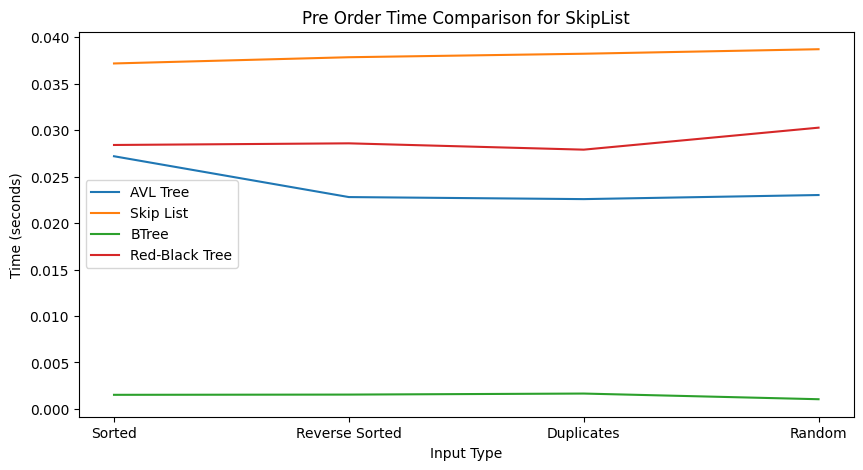

Data Size: 70000
                AVL Tree  Skip List     BTree  Red-Black Tree
Sorted          0.027192   0.037176  0.001522        0.028404
Reverse Sorted  0.022799   0.037845  0.001547        0.028581
Duplicates      0.022579   0.038222  0.001658        0.027901
Random          0.023019   0.038707  0.001049        0.030267


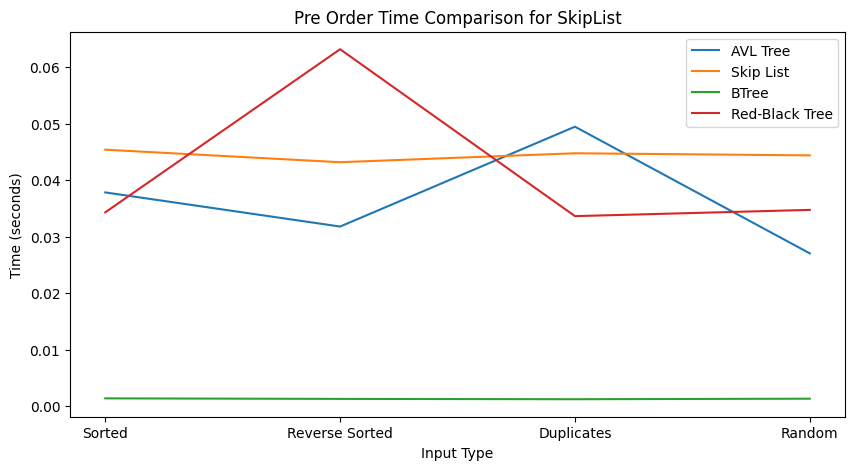

Data Size: 85000
                AVL Tree  Skip List     BTree  Red-Black Tree
Sorted          0.037837   0.045402  0.001373        0.034310
Reverse Sorted  0.031796   0.043185  0.001278        0.063192
Duplicates      0.049475   0.044770  0.001220        0.033636
Random          0.027044   0.044394  0.001315        0.034745


In [13]:
def compare_pre_order_times_skiplist(input_types, values, tree_objects):
    trees = ['AVL Tree', 'Skip List', 'BTree', 'Red-Black Tree']
    tree_classes = [AVLTree, SkipList, BTree, RedBlackTree]
    data = {tree: [] for tree in trees}

    plt.figure(figsize=(10, 5))

    for tree_index, TreeClass in enumerate(tree_classes):
        for value_index, value in enumerate(values):
            # Initialize tree with argument if it's BTree
            tree = TreeClass(3) if TreeClass == BTree else TreeClass()
            for key, val in zip(range(len(value)), value):
            # BTree's and RedBlackTree's insert method might only take one argument
                if TreeClass == BTree or TreeClass == RedBlackTree or TreeClass == SkipList:
                    tree.insert(key)
                else:
                    tree.insert(key, val)

            start = time.time()
            if trees[tree_index] == 'BTree':
                tree.preorder(tree.root)
            elif trees[tree_index] == 'Red-Black Tree':
                tree.preorder()
            elif trees[tree_index] == 'AVL Tree':
                tree.preorder(tree.root)
            elif trees[tree_index] == 'Skip List':
                tree.preorder()
            time_taken = time.time() - start
            data[trees[tree_index]].append(time_taken)

        plt.plot(input_types, data[trees[tree_index]], label=trees[tree_index])

    plt.ylabel('Time (seconds)')
    plt.xlabel('Input Type')  # This should be xlabel, not ylabel
    plt.title('Pre Order Time Comparison for SkipList')
    plt.legend()
    plt.show()
    return data

def generate_trees_and_compare_preorder_skiplist():
    input_types = ['Sorted', 'Reverse Sorted', 'Duplicates', 'Random']
    tree_objects = [AVLTree(), SkipList(), BTree(3), RedBlackTree()]
    data_sizes = [3000, 20000, 70000, 85000]
    df_list = []
    for data_size in data_sizes:
        values = [
            sorted([random.randint(1, data_size) for _ in range(data_size)]),  # Sorted
            sorted([random.randint(1, data_size) for _ in range(data_size)], reverse=True),  # Reverse Sorted
            [random.randint(1, data_size) for _ in range(data_size)],  # Duplicates
            [random.randint(1, data_size) for _ in range(data_size)]  # Random
        ]
        data = compare_pre_order_times_skiplist(input_types, values, tree_objects)
        df = pd.DataFrame(data, index=input_types)
        # df['Data Size'] = data_size
        print(f"Data Size: {data_size}")  # Print the data size
        print(df)  # Print the DataFrame for the current data size
        df_list.append(df)
    return pd.concat(df_list)

df = generate_trees_and_compare_preorder_skiplist()

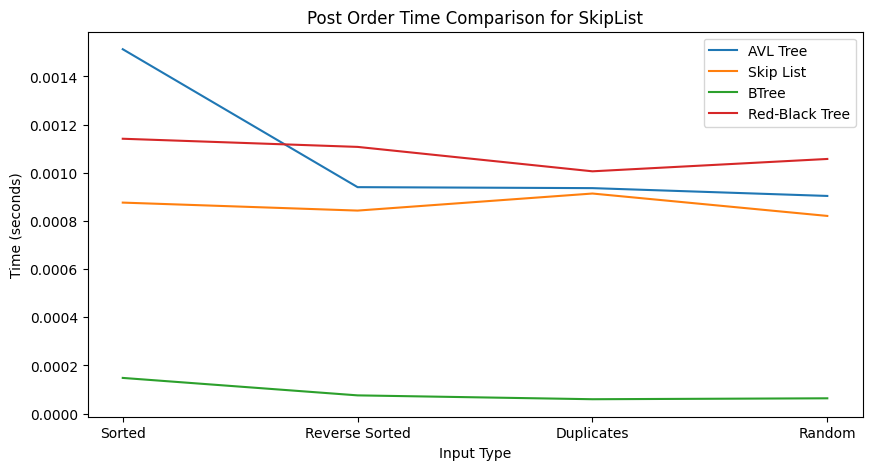

Data Size: 3000
                AVL Tree  Skip List     BTree  Red-Black Tree
Sorted          0.001513   0.000876  0.000148        0.001141
Reverse Sorted  0.000940   0.000843  0.000076        0.001107
Duplicates      0.000936   0.000914  0.000060        0.001006
Random          0.000904   0.000821  0.000064        0.001057


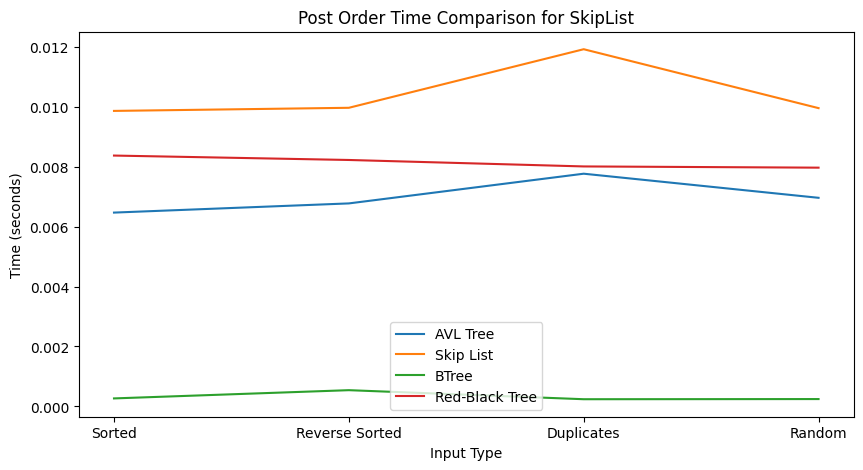

Data Size: 20000
                AVL Tree  Skip List     BTree  Red-Black Tree
Sorted          0.006466   0.009859  0.000266        0.008369
Reverse Sorted  0.006772   0.009963  0.000541        0.008221
Duplicates      0.007763   0.011917  0.000239        0.008006
Random          0.006959   0.009951  0.000244        0.007965


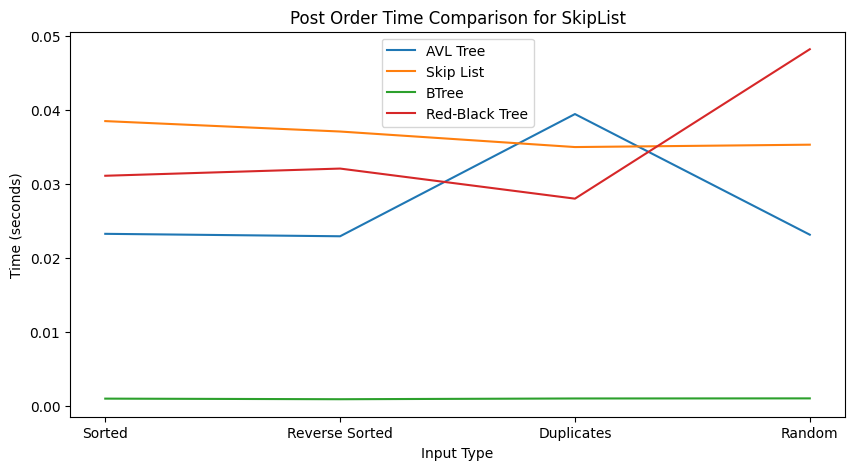

Data Size: 70000
                AVL Tree  Skip List     BTree  Red-Black Tree
Sorted          0.023259   0.038478  0.001011        0.031098
Reverse Sorted  0.022930   0.037071  0.000930        0.032070
Duplicates      0.039428   0.034973  0.001031        0.028007
Random          0.023141   0.035294  0.001044        0.048182


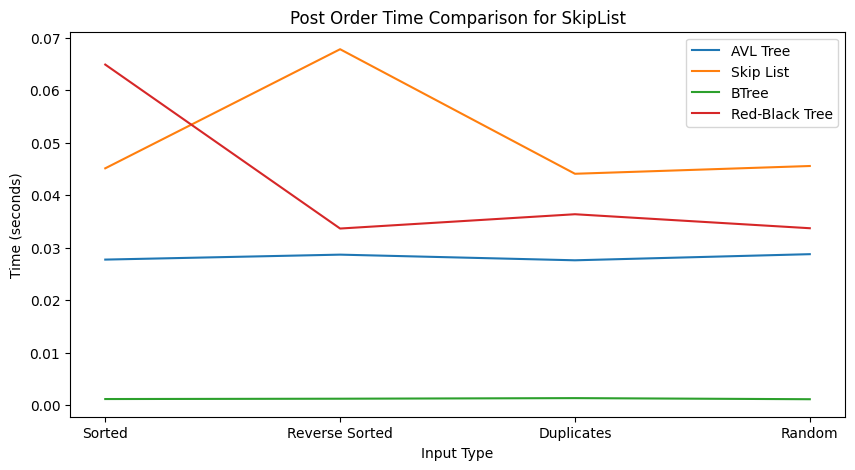

Data Size: 85000
                AVL Tree  Skip List     BTree  Red-Black Tree
Sorted          0.027715   0.045111  0.001138        0.064881
Reverse Sorted  0.028658   0.067808  0.001201        0.033633
Duplicates      0.027580   0.044071  0.001313        0.036358
Random          0.028747   0.045550  0.001103        0.033692


In [14]:
def compare_post_order_times_skiplist(input_types, values, tree_objects):
    trees = ['AVL Tree', 'Skip List', 'BTree', 'Red-Black Tree']
    tree_classes = [AVLTree, SkipList, BTree, RedBlackTree]
    data = {tree: [] for tree in trees}

    plt.figure(figsize=(10, 5))

    for tree_index, TreeClass in enumerate(tree_classes):
        for value_index, value in enumerate(values):
            # Initialize tree with argument if it's BTree
            tree = TreeClass(3) if TreeClass == BTree else TreeClass()
            for key, val in zip(range(len(value)), value):
            # BTree's and RedBlackTree's insert method might only take one argument
                if TreeClass == BTree or TreeClass == RedBlackTree or TreeClass == SkipList:
                    tree.insert(key)
                else:
                    tree.insert(key, val)

            start = time.time()
            if trees[tree_index] == 'BTree':
                tree.postorder(tree.root)
            elif trees[tree_index] == 'Red-Black Tree':
                tree.postorder()
            elif trees[tree_index] == 'AVL Tree':
                tree.postorder(tree.root)
            elif trees[tree_index] == 'Skip List':
                tree.postorder()
            time_taken = time.time() - start
            data[trees[tree_index]].append(time_taken)

        plt.plot(input_types, data[trees[tree_index]], label=trees[tree_index])

    plt.ylabel('Time (seconds)')
    plt.xlabel('Input Type')  # This should be xlabel, not ylabel
    plt.title('Post Order Time Comparison for SkipList')
    plt.legend()
    plt.show()
    return data

def generate_trees_and_compare_postorder_skiplist():
    input_types = ['Sorted', 'Reverse Sorted', 'Duplicates', 'Random']
    tree_objects = [AVLTree(), SkipList(), BTree(3), RedBlackTree()]
    data_sizes = [3000, 20000, 70000, 85000]
    df_list = []
    for data_size in data_sizes:
        values = [
            sorted([random.randint(1, data_size) for _ in range(data_size)]),  # Sorted
            sorted([random.randint(1, data_size) for _ in range(data_size)], reverse=True),  # Reverse Sorted
            [random.randint(1, data_size) for _ in range(data_size)],  # Duplicates
            [random.randint(1, data_size) for _ in range(data_size)]  # Random
        ]
        data = compare_post_order_times_skiplist(input_types, values, tree_objects)
        df = pd.DataFrame(data, index=input_types)
        # df['Data Size'] = data_size
        print(f"Data Size: {data_size}")  # Print the data size
        print(df)  # Print the DataFrame for the current data size
        df_list.append(df)
    return pd.concat(df_list)

df = generate_trees_and_compare_postorder_skiplist()